In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import math

In [ ]:
!pip install openpyxl --upgrade

In [ ]:
def normal_test(pval):
  if pval >= 0.05:
    print('pval이 0.05 이상으로 데이터가 정규분포라는 귀무가설 채택')
    print('---------------------------------------------------------------')
  else:
    print('pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택')
    print('---------------------------------------------------------------')

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/가공전/ALL_QUALITY_READY.xlsx')
df

,Ticker,Company Name,FQ12012,FQ22012,FQ32012,FQ42012,FQ12013,FQ22013,FQ32013,FQ42013,FQ12014,FQ22014,FQ32014,FQ42014,FQ12015,FQ22015,FQ32015,FQ42015,FQ12016,FQ22016,FQ32016,FQ42016,FQ12017,FQ22017,FQ32017,FQ42017,FQ12018,FQ22018,FQ32018,FQ42018,FQ12019,FQ22019,FQ32019,FQ42019,FQ12020,FQ22020,FQ32020,FQ42020,FQ12021,FQ22021,FQ32021
0,KOSDAQ:A000250,"Sam Chun Dang Pharm. Co., Ltd",NaN,5.5298,1.5702,2.8288,2.8288,5.6336,7.7599,7.3726,9.4086,10.1176,10.3949,13.3359,12.4393,11.9236,12.1263,12.1598,12.4357,12.8715,12.5679,9.599,10.0861,8.8857,9.4137,11.232,10.0941,10.515,9.9407,7.3052,7.6774,7.2465,8.7429,9.1382,8.2567,7.7738,-0.149,3.1171,NaN,NaN,NaN
1,KOSDAQ:A000440,"Joong Ang Enervis Co., Ltd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KOSDAQ:A001000,"Silla Textile Co.,Ltd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KOSDAQ:A001540,"Ahn-Gook Pharmaceutical Co., Ltd.",6.0441,6.0441,3.1619,NaN,NaN,NaN,NaN,3.8062,3.8062,5.795,6.0962,-0.6989,-0.6989,2.1949,3.002,6.9956,5.8976,2.0571,-0.4235,1.0126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KOSDAQ:A001810,"Moorim SP Co., Ltd.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,KOSE:A381970,"K Car Co., Ltd.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2296,KOSE:A383220,"F&F Co., Ltd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2297,KOSE:A383800,LX Holdings Corp.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2298,KOSE:A402340,"SK Square Co., Ltd.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ticker_list = df['Ticker']
ticker_list

0       KOSDAQ:A000250
1       KOSDAQ:A000440
2       KOSDAQ:A001000
3       KOSDAQ:A001540
4       KOSDAQ:A001810
             ...      
2295      KOSE:A381970
2296      KOSE:A383220
2297      KOSE:A383800
2298      KOSE:A402340
2299      KOSE:A900140
Name: Ticker, Length: 2300, dtype: object

In [ ]:
kosdaq_list = []
kose_list = []
for i in ticker_list:
  i_split = i.split(':')
  if i_split[0] == 'KOSDAQ':
    kosdaq_list.append(i_split[1])
  else:
    kose_list.append(i_split[1])
len(kosdaq_list)

1502

In [ ]:
not_financial_df = pd.read_excel('/content/drive/MyDrive/not_financial_list.xlsx')
not_financial_list = list(not_financial_df.iloc[:, 1])
len(not_financial_list)

2186

## FH

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/가공전/FH_python.xlsx')
df

,Symbol,Symbol Name,Kind,Item,Item Name,Frequency,2012-03-31 00:00:00,2012-06-30 00:00:00,2012-09-30 00:00:00,2012-12-31 00:00:00,2013-03-31 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-12-31 00:00:00,2014-03-31 00:00:00,2014-06-30 00:00:00,2014-09-30 00:00:00,2014-12-31 00:00:00,2015-03-31 00:00:00,2015-06-30 00:00:00,2015-09-30 00:00:00,2015-12-31 00:00:00,2016-03-31 00:00:00,2016-06-30 00:00:00,2016-09-30 00:00:00,2016-12-31 00:00:00,2017-03-31 00:00:00,2017-06-30 00:00:00,2017-09-30 00:00:00,2017-12-31 00:00:00,2018-03-31 00:00:00,2018-06-30 00:00:00,2018-09-30 00:00:00,2018-12-31 00:00:00,2019-03-31 00:00:00,2019-06-30 00:00:00,2019-09-30 00:00:00,2019-12-31 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00,2021-12-31 00:00:00,2022-01-28 00:00:00,2021-12-31 00:00:00.1,2022-01-28 00:00:00.1
0,A005930,삼성전자,SSC,S410001300,외국인보유비중(티커)(%),DAILY,50.95,49.42,50.64,50.40,49.59,47.78,48.81,49.66,50.10,50.69,51.84,51.81,51.40,51.80,50.77,49.39,49.54,50.37,50.71,50.78,50.33,53.94,53.13,52.74,52.25,52.62,52.58,55.58,56.82,57.27,57.41,56.81,54.90,55.00,55.86,55.72,54.54,53.57,51.86,51.92,52.12,9276.0,9589.0
1,A373220,LG에너지솔루션,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.91,NaN,97943.0
2,A000660,SK하이닉스,SSC,S410001300,외국인보유비중(티커)(%),DAILY,25.06,23.60,24.62,24.87,28.58,31.63,36.14,42.92,45.43,48.69,48.96,49.92,51.09,52.15,48.12,47.17,47.81,48.71,51.68,51.37,50.71,50.52,48.55,47.53,49.87,50.48,48.49,48.37,50.66,50.52,51.63,50.34,49.38,48.66,48.83,49.72,50.24,49.80,47.13,48.94,49.71,13853.0,13941.0
3,A035420,NAVER,SSC,S410001300,외국인보유비중(티커)(%),DAILY,61.74,60.93,58.67,52.64,55.66,51.09,55.65,57.82,57.78,55.77,55.20,53.07,52.74,56.32,55.60,57.26,56.21,58.99,61.02,60.58,61.40,61.12,59.92,59.66,59.20,59.13,60.94,59.30,59.16,58.08,59.42,58.32,58.26,56.16,55.31,55.91,57.04,57.03,56.58,56.20,55.04,26970.0,54307.0
4,A207940,삼성바이오로직스,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.62,12.10,10.57,9.66,8.54,10.19,9.50,9.83,8.63,8.28,8.69,8.69,9.84,10.45,10.81,10.17,10.48,10.29,10.21,10.55,11.07,10.66,87293.0,90862.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,A335870,IBKS제12호스팩,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.92,0.81,0.81,0.81,0.25,0.22,0.41,1.04,0.22,0.17,NaN,NaN
2328,A373340,유진스팩6호,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.14,0.32,0.00,0.01,NaN,NaN
2329,A323210,이베스트이안스팩1호,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.42,0.51,0.35,0.31,0.01,0.00,0.02,0.48,0.26,0.00,0.00,NaN,NaN
2330,A347140,케이프이에스제4호,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,0.00,0.00,0.00,0.00,0.71,0.95,0.08,0.07,NaN,NaN


In [ ]:
for i, e in enumerate(df['Symbol']):
  if e in kosdaq_list:
    df['Symbol'][i] = 'KOSDAQ:' + e
  elif e in kose_list:
    df['Symbol'][i] = 'KOSE:' + e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df = df[df['Symbol'].str.contains(':', na = False)]
df = df.sort_values(by = 'Symbol', ascending = True)
df = df.reset_index()
df = df.iloc[:, 1:-4]
df

,Symbol,Symbol Name,Kind,Item,Item Name,Frequency,2012-03-31 00:00:00,2012-06-30 00:00:00,2012-09-30 00:00:00,2012-12-31 00:00:00,2013-03-31 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-12-31 00:00:00,2014-03-31 00:00:00,2014-06-30 00:00:00,2014-09-30 00:00:00,2014-12-31 00:00:00,2015-03-31 00:00:00,2015-06-30 00:00:00,2015-09-30 00:00:00,2015-12-31 00:00:00,2016-03-31 00:00:00,2016-06-30 00:00:00,2016-09-30 00:00:00,2016-12-31 00:00:00,2017-03-31 00:00:00,2017-06-30 00:00:00,2017-09-30 00:00:00,2017-12-31 00:00:00,2018-03-31 00:00:00,2018-06-30 00:00:00,2018-09-30 00:00:00,2018-12-31 00:00:00,2019-03-31 00:00:00,2019-06-30 00:00:00,2019-09-30 00:00:00,2019-12-31 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00
0,KOSDAQ:A000250,삼천당제약,SSC,S410001300,외국인보유비중(티커)(%),DAILY,4.33,4.46,3.60,4.53,2.46,1.60,0.46,1.10,2.29,4.55,8.99,7.11,8.06,6.30,2.11,2.45,3.15,6.15,6.78,4.46,2.62,4.11,2.48,3.07,2.89,5.07,3.58,3.11,8.30,7.78,8.38,9.64,7.07,6.87,6.48,9.66,7.73,5.93,3.29
1,KOSDAQ:A000440,중앙에너비스,SSC,S410001300,외국인보유비중(티커)(%),DAILY,1.97,1.97,1.97,1.97,2.06,2.00,0.09,0.02,0.00,0.01,0.24,0.03,0.25,0.23,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.13,0.51,0.36,0.45,0.64,0.46,3.12,2.22,1.01,0.76,0.35,0.31,0.51
2,KOSDAQ:A001000,신라섬유,SSC,S410001300,외국인보유비중(티커)(%),DAILY,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,5.62,4.57,4.73,4.66,3.62,4.37,4.25,4.04,3.86,3.82,3.51,4.73,3.92,3.65,3.99,3.79,4.27,4.30,3.90,4.21,4.40,3.76,4.09,4.25,7.53,5.31,3.81
3,KOSDAQ:A001540,안국약품,SSC,S410001300,외국인보유비중(티커)(%),DAILY,14.93,14.91,14.82,14.84,15.11,9.91,9.30,8.68,2.31,2.78,2.82,1.22,1.33,1.63,2.63,3.54,3.07,0.90,1.96,2.57,2.50,2.41,1.85,2.66,4.32,4.31,3.58,2.84,2.54,3.04,2.18,3.17,2.27,1.77,5.09,4.90,3.33,3.92,3.86
4,KOSDAQ:A001810,무림SP,SSC,S410001300,외국인보유비중(티커)(%),DAILY,1.04,1.03,1.25,0.79,1.55,1.15,1.12,0.91,1.38,1.25,2.19,1.20,1.28,0.50,2.02,1.69,1.33,1.08,0.89,0.87,0.90,1.63,1.59,1.58,2.05,3.38,2.77,2.44,2.81,2.91,2.69,2.38,3.06,3.57,2.68,2.20,3.49,2.83,3.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,KOSE:A381970,케이카,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2291,KOSE:A383220,F&F,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.88,12.07
2292,KOSE:A383800,LX홀딩스,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.02,11.22
2293,KOSE:A402340,SK스퀘어,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
quarter_dict = {}
k = 6
for i in range(2012, 2022):
  for j in range(1, 5):
    e = f'FQ{j}{i}'
    if e == 'FQ42021':
      break
    quarter_dict[df.columns[k]] = e
    k = k + 1
df = df.rename(columns = quarter_dict)
df

,Symbol,Symbol Name,Kind,Item,Item Name,Frequency,FQ12012,FQ22012,FQ32012,FQ42012,FQ12013,FQ22013,FQ32013,FQ42013,FQ12014,FQ22014,FQ32014,FQ42014,FQ12015,FQ22015,FQ32015,FQ42015,FQ12016,FQ22016,FQ32016,FQ42016,FQ12017,FQ22017,FQ32017,FQ42017,FQ12018,FQ22018,FQ32018,FQ42018,FQ12019,FQ22019,FQ32019,FQ42019,FQ12020,FQ22020,FQ32020,FQ42020,FQ12021,FQ22021,FQ32021
0,KOSDAQ:A000250,삼천당제약,SSC,S410001300,외국인보유비중(티커)(%),DAILY,4.33,4.46,3.60,4.53,2.46,1.60,0.46,1.10,2.29,4.55,8.99,7.11,8.06,6.30,2.11,2.45,3.15,6.15,6.78,4.46,2.62,4.11,2.48,3.07,2.89,5.07,3.58,3.11,8.30,7.78,8.38,9.64,7.07,6.87,6.48,9.66,7.73,5.93,3.29
1,KOSDAQ:A000440,중앙에너비스,SSC,S410001300,외국인보유비중(티커)(%),DAILY,1.97,1.97,1.97,1.97,2.06,2.00,0.09,0.02,0.00,0.01,0.24,0.03,0.25,0.23,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.13,0.51,0.36,0.45,0.64,0.46,3.12,2.22,1.01,0.76,0.35,0.31,0.51
2,KOSDAQ:A001000,신라섬유,SSC,S410001300,외국인보유비중(티커)(%),DAILY,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,5.62,4.57,4.73,4.66,3.62,4.37,4.25,4.04,3.86,3.82,3.51,4.73,3.92,3.65,3.99,3.79,4.27,4.30,3.90,4.21,4.40,3.76,4.09,4.25,7.53,5.31,3.81
3,KOSDAQ:A001540,안국약품,SSC,S410001300,외국인보유비중(티커)(%),DAILY,14.93,14.91,14.82,14.84,15.11,9.91,9.30,8.68,2.31,2.78,2.82,1.22,1.33,1.63,2.63,3.54,3.07,0.90,1.96,2.57,2.50,2.41,1.85,2.66,4.32,4.31,3.58,2.84,2.54,3.04,2.18,3.17,2.27,1.77,5.09,4.90,3.33,3.92,3.86
4,KOSDAQ:A001810,무림SP,SSC,S410001300,외국인보유비중(티커)(%),DAILY,1.04,1.03,1.25,0.79,1.55,1.15,1.12,0.91,1.38,1.25,2.19,1.20,1.28,0.50,2.02,1.69,1.33,1.08,0.89,0.87,0.90,1.63,1.59,1.58,2.05,3.38,2.77,2.44,2.81,2.91,2.69,2.38,3.06,3.57,2.68,2.20,3.49,2.83,3.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,KOSE:A381970,케이카,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2291,KOSE:A383220,F&F,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.88,12.07
2292,KOSE:A383800,LX홀딩스,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.02,11.22
2293,KOSE:A402340,SK스퀘어,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[df['Symbol'].isin(not_financial_list)]
df = df.rename(columns = {'Symbol' : 'Ticker'})
df = df.reset_index(drop = True)
df

,Ticker,Symbol Name,Kind,Item,Item Name,Frequency,FQ12012,FQ22012,FQ32012,FQ42012,FQ12013,FQ22013,FQ32013,FQ42013,FQ12014,FQ22014,FQ32014,FQ42014,FQ12015,FQ22015,FQ32015,FQ42015,FQ12016,FQ22016,FQ32016,FQ42016,FQ12017,FQ22017,FQ32017,FQ42017,FQ12018,FQ22018,FQ32018,FQ42018,FQ12019,FQ22019,FQ32019,FQ42019,FQ12020,FQ22020,FQ32020,FQ42020,FQ12021,FQ22021,FQ32021
0,KOSDAQ:A000250,삼천당제약,SSC,S410001300,외국인보유비중(티커)(%),DAILY,4.33,4.46,3.60,4.53,2.46,1.60,0.46,1.10,2.29,4.55,8.99,7.11,8.06,6.30,2.11,2.45,3.15,6.15,6.78,4.46,2.62,4.11,2.48,3.07,2.89,5.07,3.58,3.11,8.30,7.78,8.38,9.64,7.07,6.87,6.48,9.66,7.73,5.93,3.29
1,KOSDAQ:A000440,중앙에너비스,SSC,S410001300,외국인보유비중(티커)(%),DAILY,1.97,1.97,1.97,1.97,2.06,2.00,0.09,0.02,0.00,0.01,0.24,0.03,0.25,0.23,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.13,0.51,0.36,0.45,0.64,0.46,3.12,2.22,1.01,0.76,0.35,0.31,0.51
2,KOSDAQ:A001000,신라섬유,SSC,S410001300,외국인보유비중(티커)(%),DAILY,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,5.62,4.57,4.73,4.66,3.62,4.37,4.25,4.04,3.86,3.82,3.51,4.73,3.92,3.65,3.99,3.79,4.27,4.30,3.90,4.21,4.40,3.76,4.09,4.25,7.53,5.31,3.81
3,KOSDAQ:A001540,안국약품,SSC,S410001300,외국인보유비중(티커)(%),DAILY,14.93,14.91,14.82,14.84,15.11,9.91,9.30,8.68,2.31,2.78,2.82,1.22,1.33,1.63,2.63,3.54,3.07,0.90,1.96,2.57,2.50,2.41,1.85,2.66,4.32,4.31,3.58,2.84,2.54,3.04,2.18,3.17,2.27,1.77,5.09,4.90,3.33,3.92,3.86
4,KOSDAQ:A001810,무림SP,SSC,S410001300,외국인보유비중(티커)(%),DAILY,1.04,1.03,1.25,0.79,1.55,1.15,1.12,0.91,1.38,1.25,2.19,1.20,1.28,0.50,2.02,1.69,1.33,1.08,0.89,0.87,0.90,1.63,1.59,1.58,2.05,3.38,2.77,2.44,2.81,2.91,2.69,2.38,3.06,3.57,2.68,2.20,3.49,2.83,3.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,KOSE:A381970,케이카,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2177,KOSE:A383220,F&F,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.88,12.07
2178,KOSE:A383800,LX홀딩스,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.02,11.22
2179,KOSE:A402340,SK스퀘어,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in list(df.columns[6:]):
  Q3 = df[i].quantile(q = 0.75)
  Q1 = df[i].quantile(q = 0.25)
  IQR= Q3 - Q1
  condition = (df[i] > (Q3 + IQR * 1.5)) | (df[i] < (Q1 - IQR * 1.5))
  df[i][condition] = np.NaN
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Ticker,Symbol Name,Kind,Item,Item Name,Frequency,FQ12012,FQ22012,FQ32012,FQ42012,FQ12013,FQ22013,FQ32013,FQ42013,FQ12014,FQ22014,FQ32014,FQ42014,FQ12015,FQ22015,FQ32015,FQ42015,FQ12016,FQ22016,FQ32016,FQ42016,FQ12017,FQ22017,FQ32017,FQ42017,FQ12018,FQ22018,FQ32018,FQ42018,FQ12019,FQ22019,FQ32019,FQ42019,FQ12020,FQ22020,FQ32020,FQ42020,FQ12021,FQ22021,FQ32021
0,KOSDAQ:A000250,삼천당제약,SSC,S410001300,외국인보유비중(티커)(%),DAILY,4.33,4.46,3.60,4.53,2.46,1.60,0.46,1.10,2.29,4.55,8.99,7.11,8.06,6.30,2.11,2.45,3.15,6.15,6.78,4.46,2.62,4.11,2.48,3.07,2.89,5.07,3.58,3.11,8.30,7.78,8.38,9.64,7.07,6.87,6.48,9.66,7.73,5.93,3.29
1,KOSDAQ:A000440,중앙에너비스,SSC,S410001300,외국인보유비중(티커)(%),DAILY,1.97,1.97,1.97,1.97,2.06,2.00,0.09,0.02,0.00,0.01,0.24,0.03,0.25,0.23,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.13,0.51,0.36,0.45,0.64,0.46,3.12,2.22,1.01,0.76,0.35,0.31,0.51
2,KOSDAQ:A001000,신라섬유,SSC,S410001300,외국인보유비중(티커)(%),DAILY,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,5.62,4.57,4.73,4.66,3.62,4.37,4.25,4.04,3.86,3.82,3.51,4.73,3.92,3.65,3.99,3.79,4.27,4.30,3.90,4.21,4.40,3.76,4.09,4.25,7.53,5.31,3.81
3,KOSDAQ:A001540,안국약품,SSC,S410001300,외국인보유비중(티커)(%),DAILY,14.93,14.91,14.82,14.84,15.11,9.91,9.30,8.68,2.31,2.78,2.82,1.22,1.33,1.63,2.63,3.54,3.07,0.90,1.96,2.57,2.50,2.41,1.85,2.66,4.32,4.31,3.58,2.84,2.54,3.04,2.18,3.17,2.27,1.77,5.09,4.90,3.33,3.92,3.86
4,KOSDAQ:A001810,무림SP,SSC,S410001300,외국인보유비중(티커)(%),DAILY,1.04,1.03,1.25,0.79,1.55,1.15,1.12,0.91,1.38,1.25,2.19,1.20,1.28,0.50,2.02,1.69,1.33,1.08,0.89,0.87,0.90,1.63,1.59,1.58,2.05,3.38,2.77,2.44,2.81,2.91,2.69,2.38,3.06,3.57,2.68,2.20,3.49,2.83,3.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,KOSE:A381970,케이카,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2177,KOSE:A383220,F&F,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.88,12.07
2178,KOSE:A383800,LX홀딩스,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.02,11.22
2179,KOSE:A402340,SK스퀘어,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


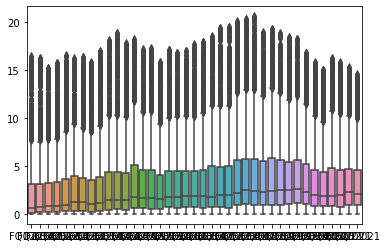

In [ ]:
sns.boxplot(data = df.iloc[:, 6:])

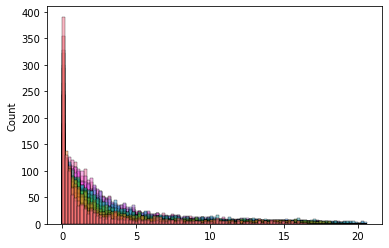

In [ ]:
sns.histplot(data = df.iloc[:, 6:], legend = False)

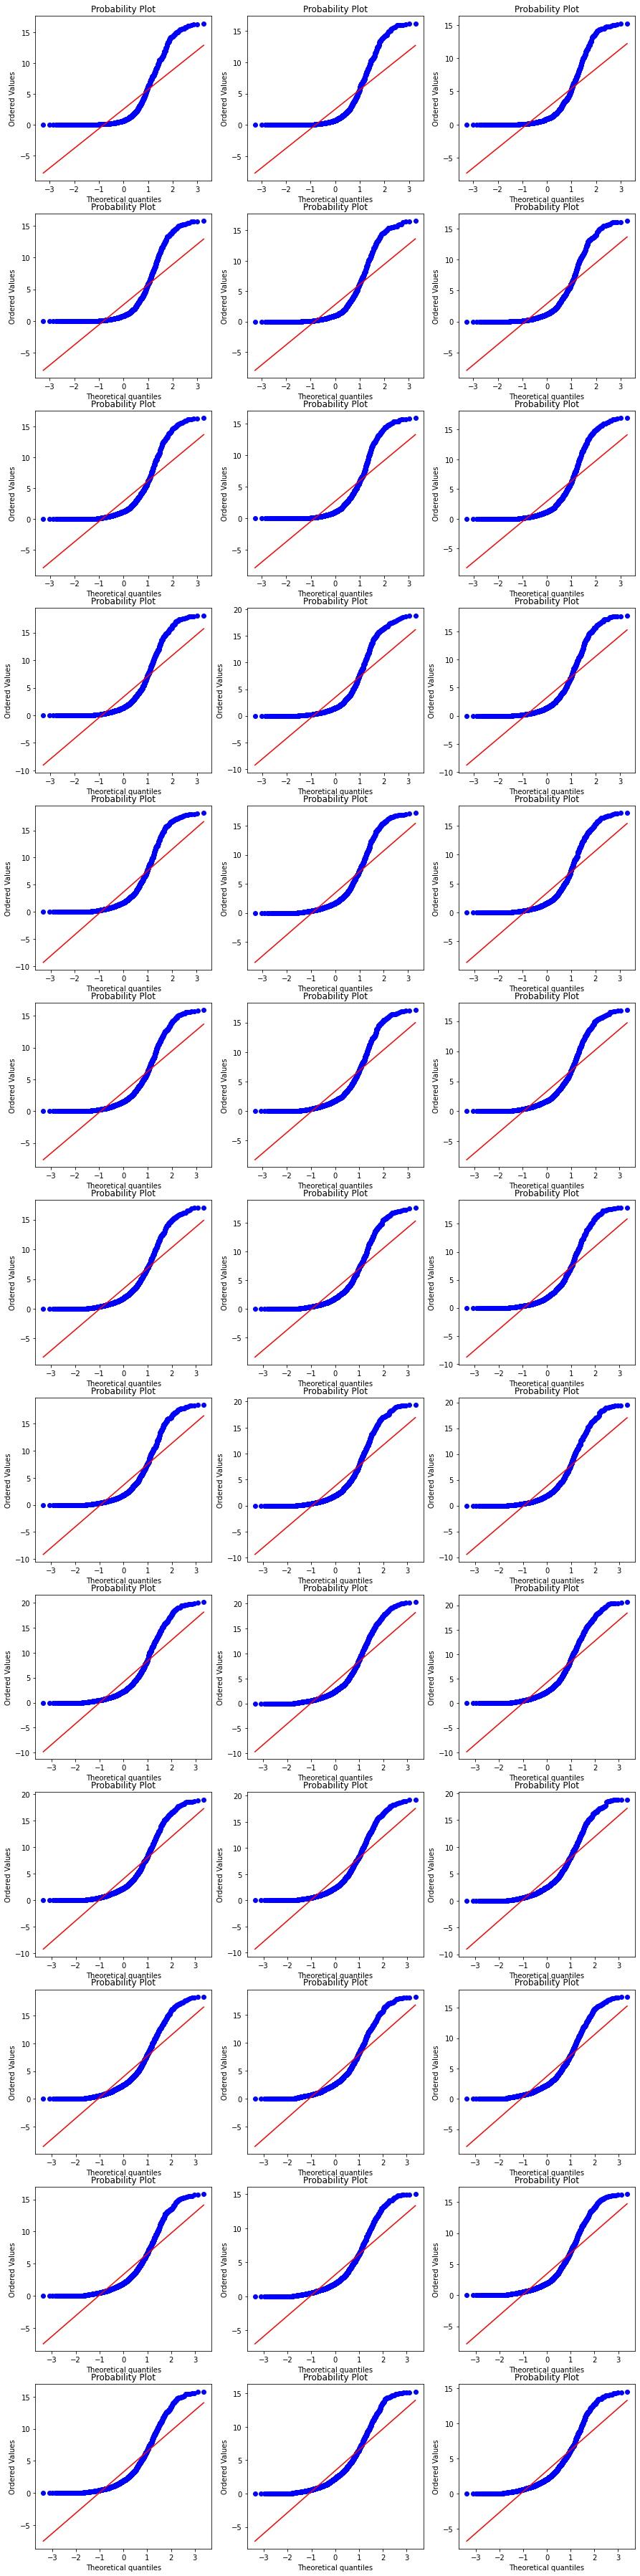

In [ ]:
fig = plt.figure(figsize = (15, 65))
for i, e in enumerate(list(df.columns[6:])):
  df_list = df[e].dropna()
  ax = fig.add_subplot(13, 3, i + 1)
  stats.probplot(df_list, dist = stats.norm, plot = ax)
plt.show()

In [ ]:
for i in list(df.columns[6:]):
  df_list = df[i].dropna()
  _, pval = stats.normaltest(df_list)
  print(f'{i} 분기의 pval : {pval}')
  normal_test(pval)

In [ ]:
for i in list(df.columns[6:]):
  df_list = df[i].dropna()
  _, pval = stats.jarque_bera(df_list)
  print(f'{i} 분기의 pval : {pval}')
  normal_test(pval)

In [ ]:
df.to_excel('/content/drive/MyDrive/가공후/ALL_FH_READY*.xlsx', index = False)

In [ ]:
for i in list(df.columns[6:]):
  df_list_rev = df[i]
  for j, k in enumerate(df_list_rev):
    df_list_rev[j] = np.log(k)
  df[i] = np.array(df_list_rev, dtype = np.float64)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


,Ticker,Symbol Name,Kind,Item,Item Name,Frequency,FQ12012,FQ22012,FQ32012,FQ42012,FQ12013,FQ22013,FQ32013,FQ42013,FQ12014,FQ22014,FQ32014,FQ42014,FQ12015,FQ22015,FQ32015,FQ42015,FQ12016,FQ22016,FQ32016,FQ42016,FQ12017,FQ22017,FQ32017,FQ42017,FQ12018,FQ22018,FQ32018,FQ42018,FQ12019,FQ22019,FQ32019,FQ42019,FQ12020,FQ22020,FQ32020,FQ42020,FQ12021,FQ22021,FQ32021
0,KOSDAQ:A000250,삼천당제약,SSC,S410001300,외국인보유비중(티커)(%),DAILY,1.465568,1.495149,1.280934,1.510722,0.900161,0.470004,-0.776529,0.095310,0.828552,1.515127,2.196113,1.961502,2.086914,1.840550,0.746688,0.896088,1.147402,1.816452,1.913977,1.495149,0.963174,1.413423,0.908259,1.121678,1.061257,1.623341,1.275363,1.134623,2.116256,2.051556,2.125848,2.265921,1.955860,1.927164,1.868721,2.267994,2.045109,1.780024,1.190888
1,KOSDAQ:A000440,중앙에너비스,SSC,S410001300,외국인보유비중(티커)(%),DAILY,0.678034,0.678034,0.678034,0.678034,0.722706,0.693147,-2.407946,-3.912023,-inf,-4.605170,-1.427116,-3.506558,-1.386294,-1.469676,-4.605170,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-3.912023,-3.912023,-2.040221,-0.673345,-1.021651,-0.798508,-0.446287,-0.776529,1.137833,0.797507,0.009950,-0.274437,-1.049822,-1.171183,-0.673345
2,KOSDAQ:A001000,신라섬유,SSC,S410001300,외국인보유비중(티커)(%),DAILY,-3.912023,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,0.770108,1.726332,1.519513,1.553925,1.539015,1.286474,1.474763,1.446919,1.396245,1.350667,1.340250,1.255616,1.553925,1.366092,1.294727,1.383791,1.332366,1.451614,1.458615,1.360977,1.437463,1.481605,1.324419,1.408545,1.446919,2.018895,1.669592,1.337629
3,KOSDAQ:A001540,안국약품,SSC,S410001300,외국인보유비중(티커)(%),DAILY,2.703373,2.702032,2.695978,2.697326,2.715357,2.293544,2.230014,2.161022,0.837248,1.022451,1.036737,0.198851,0.285179,0.488580,0.966984,1.264127,1.121678,-0.105361,0.672944,0.943906,0.916291,0.879627,0.615186,0.978326,1.463255,1.460938,1.275363,1.043804,0.932164,1.111858,0.779325,1.153732,0.819780,0.570980,1.627278,1.589235,1.202972,1.366092,1.350667
4,KOSDAQ:A001810,무림SP,SSC,S410001300,외국인보유비중(티커)(%),DAILY,0.039221,0.029559,0.223144,-0.235722,0.438255,0.139762,0.113329,-0.094311,0.322083,0.223144,0.783902,0.182322,0.246860,-0.693147,0.703098,0.524729,0.285179,0.076961,-0.116534,-0.139262,-0.105361,0.488580,0.463734,0.457425,0.717840,1.217876,1.018847,0.891998,1.033184,1.068153,0.989541,0.867100,1.118415,1.272566,0.985817,0.788457,1.249902,1.040277,1.141033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,KOSE:A381970,케이카,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2177,KOSE:A383220,F&F,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.386926,2.490723
2178,KOSE:A383800,LX홀딩스,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.709383,2.417698
2179,KOSE:A402340,SK스퀘어,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in list(df.columns[6:]):
  Q3 = df[i].quantile(q = 0.75)
  Q1 = df[i].quantile(q = 0.25)
  IQR= Q3 - Q1
  condition = (df[i] > (Q3 + IQR * 1.5)) | (df[i] < (Q1 - IQR * 1.5))
  df[i][condition] = np.NaN
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Ticker,Symbol Name,Kind,Item,Item Name,Frequency,FQ12012,FQ22012,FQ32012,FQ42012,FQ12013,FQ22013,FQ32013,FQ42013,FQ12014,FQ22014,FQ32014,FQ42014,FQ12015,FQ22015,FQ32015,FQ42015,FQ12016,FQ22016,FQ32016,FQ42016,FQ12017,FQ22017,FQ32017,FQ42017,FQ12018,FQ22018,FQ32018,FQ42018,FQ12019,FQ22019,FQ32019,FQ42019,FQ12020,FQ22020,FQ32020,FQ42020,FQ12021,FQ22021,FQ32021
0,KOSDAQ:A000250,삼천당제약,SSC,S410001300,외국인보유비중(티커)(%),DAILY,1.465568,1.495149,1.280934,1.510722,0.900161,0.470004,-0.776529,0.095310,0.828552,1.515127,2.196113,1.961502,2.086914,1.840550,0.746688,0.896088,1.147402,1.816452,1.913977,1.495149,0.963174,1.413423,0.908259,1.121678,1.061257,1.623341,1.275363,1.134623,2.116256,2.051556,2.125848,2.265921,1.955860,1.927164,1.868721,2.267994,2.045109,1.780024,1.190888
1,KOSDAQ:A000440,중앙에너비스,SSC,S410001300,외국인보유비중(티커)(%),DAILY,0.678034,0.678034,0.678034,0.678034,0.722706,0.693147,-2.407946,-3.912023,NaN,NaN,-1.427116,-3.506558,-1.386294,-1.469676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.040221,-0.673345,-1.021651,-0.798508,-0.446287,-0.776529,1.137833,0.797507,0.009950,-0.274437,-1.049822,-1.171183,-0.673345
2,KOSDAQ:A001000,신라섬유,SSC,S410001300,외국인보유비중(티커)(%),DAILY,-3.912023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.770108,1.726332,1.519513,1.553925,1.539015,1.286474,1.474763,1.446919,1.396245,1.350667,1.340250,1.255616,1.553925,1.366092,1.294727,1.383791,1.332366,1.451614,1.458615,1.360977,1.437463,1.481605,1.324419,1.408545,1.446919,2.018895,1.669592,1.337629
3,KOSDAQ:A001540,안국약품,SSC,S410001300,외국인보유비중(티커)(%),DAILY,2.703373,2.702032,2.695978,2.697326,2.715357,2.293544,2.230014,2.161022,0.837248,1.022451,1.036737,0.198851,0.285179,0.488580,0.966984,1.264127,1.121678,-0.105361,0.672944,0.943906,0.916291,0.879627,0.615186,0.978326,1.463255,1.460938,1.275363,1.043804,0.932164,1.111858,0.779325,1.153732,0.819780,0.570980,1.627278,1.589235,1.202972,1.366092,1.350667
4,KOSDAQ:A001810,무림SP,SSC,S410001300,외국인보유비중(티커)(%),DAILY,0.039221,0.029559,0.223144,-0.235722,0.438255,0.139762,0.113329,-0.094311,0.322083,0.223144,0.783902,0.182322,0.246860,-0.693147,0.703098,0.524729,0.285179,0.076961,-0.116534,-0.139262,-0.105361,0.488580,0.463734,0.457425,0.717840,1.217876,1.018847,0.891998,1.033184,1.068153,0.989541,0.867100,1.118415,1.272566,0.985817,0.788457,1.249902,1.040277,1.141033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,KOSE:A381970,케이카,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2177,KOSE:A383220,F&F,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.386926,2.490723
2178,KOSE:A383800,LX홀딩스,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.709383,2.417698
2179,KOSE:A402340,SK스퀘어,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


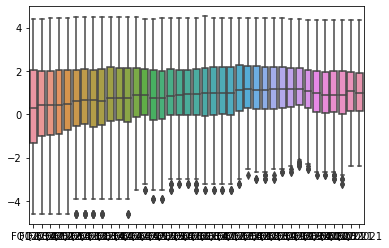

In [ ]:
sns.boxplot(data = df.iloc[:, 6:])

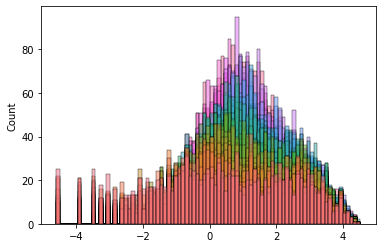

In [ ]:
sns.histplot(data = df.iloc[:, 6:], legend = False)

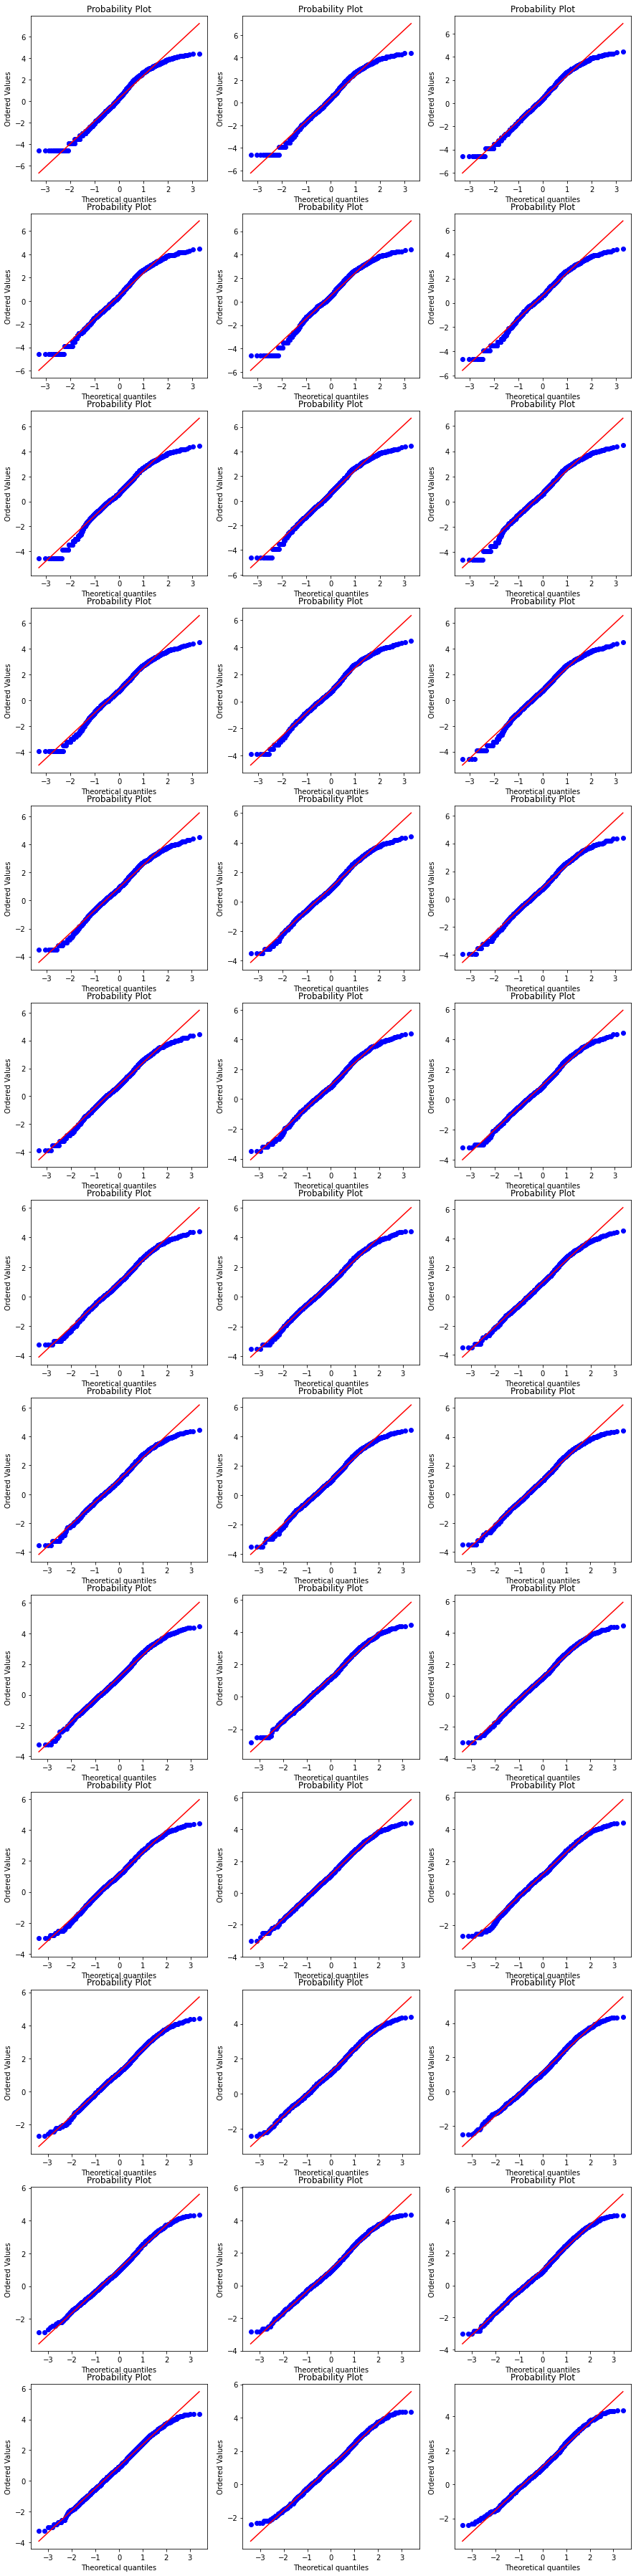

In [ ]:
fig = plt.figure(figsize = (15, 65))
for i, e in enumerate(list(df.columns[6:])):
  df_list = df[e].dropna()
  ax = fig.add_subplot(13, 3, i + 1)
  stats.probplot(df_list, dist = stats.norm, plot = ax)
plt.show()

In [ ]:
for i in list(df.columns[6:]):
  df_list = df[i].dropna()
  _, pval = stats.normaltest(df_list)
  print(f'{i} 분기의 pval : {pval}')
  normal_test(pval)

FQ12012 분기의 pval : 9.600991752292588e-24
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ22012 분기의 pval : 2.0010205659221746e-10
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ32012 분기의 pval : 1.6447428488380385e-11
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ42012 분기의 pval : 5.00476350149869e-09
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ12013 분기의 pval : 1.2948953648903377e-07
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ22013 분기의 pval : 3.377836654536891e-08
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ32013 분기의 pval : 9.602156308193386e-08
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
-----------------------------------------------

In [ ]:
for i in list(df.columns[6:]):
  df_list = df[i].dropna()
  _, pval = stats.jarque_bera(df_list)
  print(f'{i} 분기의 pval : {pval}')
  normal_test(pval)

FQ12012 분기의 pval : 8.349152480491284e-10
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ22012 분기의 pval : 2.730636473602388e-07
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ32012 분기의 pval : 7.262557381038093e-07
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ42012 분기의 pval : 1.3872483887178433e-06
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ12013 분기의 pval : 2.3372516100295115e-07
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ22013 분기의 pval : 5.737913655323723e-08
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ32013 분기의 pval : 3.6459139152178466e-08
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
----------------------------------------------

In [ ]:
df.to_excel('/content/drive/MyDrive/가공후/ALL_FH_READY.xlsx', index = False)

## UPSIDE

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/가공전/UPSIDE_python.xlsx')
df

,Symbol,Symbol Name,Kind,Item,Item Name,Frequency,2011-09-01 00:00:00,2011-09-02 00:00:00,2011-09-03 00:00:00,2011-09-04 00:00:00,2011-09-05 00:00:00,2011-09-06 00:00:00,2011-09-07 00:00:00,2011-09-08 00:00:00,2011-09-09 00:00:00,2011-09-10 00:00:00,2011-09-11 00:00:00,2011-09-12 00:00:00,2011-09-13 00:00:00,2011-09-14 00:00:00,2011-09-15 00:00:00,2011-09-16 00:00:00,2011-09-17 00:00:00,2011-09-18 00:00:00,2011-09-19 00:00:00,2011-09-20 00:00:00,2011-09-21 00:00:00,2011-09-22 00:00:00,2011-09-23 00:00:00,2011-09-24 00:00:00,2011-09-25 00:00:00,2011-09-26 00:00:00,2011-09-27 00:00:00,2011-09-28 00:00:00,2011-09-29 00:00:00,2011-09-30 00:00:00,2011-10-01 00:00:00,2011-10-02 00:00:00,2011-10-03 00:00:00,2011-10-04 00:00:00,...,2021-12-20 00:00:00,2021-12-21 00:00:00,2021-12-22 00:00:00,2021-12-23 00:00:00,2021-12-24 00:00:00,2021-12-25 00:00:00,2021-12-26 00:00:00,2021-12-27 00:00:00,2021-12-28 00:00:00,2021-12-29 00:00:00,2021-12-30 00:00:00,2021-12-31 00:00:00,2022-01-01 00:00:00,2022-01-02 00:00:00,2022-01-03 00:00:00,2022-01-04 00:00:00,2022-01-05 00:00:00,2022-01-06 00:00:00,2022-01-07 00:00:00,2022-01-08 00:00:00,2022-01-09 00:00:00,2022-01-10 00:00:00,2022-01-11 00:00:00,2022-01-12 00:00:00,2022-01-13 00:00:00,2022-01-14 00:00:00,2022-01-15 00:00:00,2022-01-16 00:00:00,2022-01-17 00:00:00,2022-01-18 00:00:00,2022-01-19 00:00:00,2022-01-20 00:00:00,2022-01-21 00:00:00,2022-01-22 00:00:00,2022-01-23 00:00:00,2022-01-24 00:00:00,2022-01-25 00:00:00,2022-01-26 00:00:00,2022-01-27 00:00:00,2022-01-28 00:00:00
0,A005930,삼성전자,CON,F730021210,적정주가 괴리율 (E3)(%),2022(ANNUAL),41.582361,41.950585,41.950585,41.950585,49.329685,49.601100,40.013972,34.470802,37.919103,37.919103,37.919103,37.919103,37.919103,42.864409,39.529053,34.808145,34.808145,34.808145,33.139728,32.647226,31.847847,35.881266,41.617678,41.617678,41.617678,38.511226,33.371642,32.875836,27.378017,26.923095,26.923095,26.923095,26.923095,28.623188,...,26.204929,24.588988,22.549118,21.782228,20.874534,20.874534,20.874534,21.326683,21.175592,23.482234,24.270754,24.270754,24.270754,24.270754,23.796438,23.639136,26.277778,27.098830,25.104725,25.104725,25.104725,27.201282,25.750317,25.750317,27.364570,28.353169,28.353169,28.353169,28.021935,28.853247,30.035387,29.695425,31.793651,31.793651,31.793651,32.671105,34.643243,35.929059,39.741935,35.929059
1,A373220,LG에너지솔루션,CON,F730021210,적정주가 괴리율 (E3)(%),2022(ANNUAL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.253267,12.777778
2,A000660,SK하이닉스,CON,F730021210,적정주가 괴리율 (E3)(%),2022(ANNUAL),71.520833,72.418848,72.418848,72.418848,87.646724,91.311765,62.205128,63.886010,58.944724,58.944724,58.944724,58.944724,58.944724,57.813602,48.464455,43.041096,43.041096,43.041096,49.171429,44.692841,45.430556,45.767981,55.125926,55.125926,54.054321,54.842105,45.985882,50.958637,41.977117,45.302108,45.302108,45.302108,44.997658,48.077295,...,16.038174,12.310040,10.099213,12.600000,12.839844,12.839844,12.839844,14.630952,13.282353,13.728346,10.255725,10.255725,10.255725,10.255725,13.415564,13.415564,16.126693,16.591200,16.124409,16.124409,16.124409,19.678715,16.406250,15.953307,15.561390,17.848249,17.848249,17.848249,19.240157,20.742292,20.951969,22.887200,30.175630,30.175630,30.175630,30.175630,31.278814,31.837447,36.483700,28.946888
3,A035420,NAVER,CON,F730021210,적정주가 괴리율 (E3)(%),2022(ANNUAL),20.289157,18.574822,18.574822,18.574822,17.467765,16.887037,15.023235,19.150943,21.734940,21.734940,21.734940,21.734940,21.734940,24.127764,23.219512,22.621359,22.621359,22.621359,20.000000,16.137931,12.266667,13.000000,18.213457,18.213457,18.213457,19.882353,17.939815,17.126437,15.271493,11.705286,11.705286,11.705286,11.705286,11.705286,...,46.648794,45.866667,44.517834,44.708995,42.447917,42.447917,42.447917,43.75

In [ ]:
for i, e in enumerate(df['Symbol']):
  if e in kosdaq_list:
    df['Symbol'][i] = 'KOSDAQ:' + e
  elif e in kose_list:
    df['Symbol'][i] = 'KOSE:' + e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df = df[df['Symbol'].str.contains(':', na = False)]
df = df.sort_values(by = 'Symbol', ascending = True)
df = df.rename(columns = {'Symbol' : 'Ticker'})
df = df.reset_index()
df = df.iloc[:, 1:-4]
df

,Ticker,Symbol Name,Kind,Item,Item Name,Frequency,2011-09-01 00:00:00,2011-09-02 00:00:00,2011-09-03 00:00:00,2011-09-04 00:00:00,2011-09-05 00:00:00,2011-09-06 00:00:00,2011-09-07 00:00:00,2011-09-08 00:00:00,2011-09-09 00:00:00,2011-09-10 00:00:00,2011-09-11 00:00:00,2011-09-12 00:00:00,2011-09-13 00:00:00,2011-09-14 00:00:00,2011-09-15 00:00:00,2011-09-16 00:00:00,2011-09-17 00:00:00,2011-09-18 00:00:00,2011-09-19 00:00:00,2011-09-20 00:00:00,2011-09-21 00:00:00,2011-09-22 00:00:00,2011-09-23 00:00:00,2011-09-24 00:00:00,2011-09-25 00:00:00,2011-09-26 00:00:00,2011-09-27 00:00:00,2011-09-28 00:00:00,2011-09-29 00:00:00,2011-09-30 00:00:00,2011-10-01 00:00:00,2011-10-02 00:00:00,2011-10-03 00:00:00,2011-10-04 00:00:00,...,2021-12-16 00:00:00,2021-12-17 00:00:00,2021-12-18 00:00:00,2021-12-19 00:00:00,2021-12-20 00:00:00,2021-12-21 00:00:00,2021-12-22 00:00:00,2021-12-23 00:00:00,2021-12-24 00:00:00,2021-12-25 00:00:00,2021-12-26 00:00:00,2021-12-27 00:00:00,2021-12-28 00:00:00,2021-12-29 00:00:00,2021-12-30 00:00:00,2021-12-31 00:00:00,2022-01-01 00:00:00,2022-01-02 00:00:00,2022-01-03 00:00:00,2022-01-04 00:00:00,2022-01-05 00:00:00,2022-01-06 00:00:00,2022-01-07 00:00:00,2022-01-08 00:00:00,2022-01-09 00:00:00,2022-01-10 00:00:00,2022-01-11 00:00:00,2022-01-12 00:00:00,2022-01-13 00:00:00,2022-01-14 00:00:00,2022-01-15 00:00:00,2022-01-16 00:00:00,2022-01-17 00:00:00,2022-01-18 00:00:00,2022-01-19 00:00:00,2022-01-20 00:00:00,2022-01-21 00:00:00,2022-01-22 00:00:00,2022-01-23 00:00:00,2022-01-24 00:00:00
0,KOSDAQ:A000250,삼천당제약,CON,F730021210,적정주가 괴리율 (E3)(%),2022(ANNUAL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KOSDAQ:A000440,중앙에너비스,CON,F730021210,적정주가 괴리율 (E3)(%),2022(ANNUAL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KOSDAQ:A001000,신라섬유,CON,F730021210,적정주가 괴리율 (E3)(%),2022(ANNUAL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KOSDAQ:A001540,안국약품,CON,F730021210,적정주가 괴리율 (E3)(%),2022(ANNUAL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KOSDAQ:A001810,무림SP,CON,F730021210,적정주가 괴리율 (E3)(%),2022(ANNUAL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,KOSE:A381970,케이카,CON,F730021210,적정주가 괴리율 (E3)(%),2022(ANNUAL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.812169,29.368272,29.368272,29.368272,36.727545,40.947531,37.966767,40.298003,41.603101,41.

In [ ]:
df = df[df['Ticker'].isin(not_financial_list)]
df = df.reset_index(drop = True)
df

,Ticker,Symbol Name,Kind,Item,Item Name,Frequency,2011-09-01 00:00:00,2011-09-02 00:00:00,2011-09-03 00:00:00,2011-09-04 00:00:00,2011-09-05 00:00:00,2011-09-06 00:00:00,2011-09-07 00:00:00,2011-09-08 00:00:00,2011-09-09 00:00:00,2011-09-10 00:00:00,2011-09-11 00:00:00,2011-09-12 00:00:00,2011-09-13 00:00:00,2011-09-14 00:00:00,2011-09-15 00:00:00,2011-09-16 00:00:00,2011-09-17 00:00:00,2011-09-18 00:00:00,2011-09-19 00:00:00,2011-09-20 00:00:00,2011-09-21 00:00:00,2011-09-22 00:00:00,2011-09-23 00:00:00,2011-09-24 00:00:00,2011-09-25 00:00:00,2011-09-26 00:00:00,2011-09-27 00:00:00,2011-09-28 00:00:00,2011-09-29 00:00:00,2011-09-30 00:00:00,2011-10-01 00:00:00,2011-10-02 00:00:00,2011-10-03 00:00:00,2011-10-04 00:00:00,...,2021-12-16 00:00:00,2021-12-17 00:00:00,2021-12-18 00:00:00,2021-12-19 00:00:00,2021-12-20 00:00:00,2021-12-21 00:00:00,2021-12-22 00:00:00,2021-12-23 00:00:00,2021-12-24 00:00:00,2021-12-25 00:00:00,2021-12-26 00:00:00,2021-12-27 00:00:00,2021-12-28 00:00:00,2021-12-29 00:00:00,2021-12-30 00:00:00,2021-12-31 00:00:00,2022-01-01 00:00:00,2022-01-02 00:00:00,2022-01-03 00:00:00,2022-01-04 00:00:00,2022-01-05 00:00:00,2022-01-06 00:00:00,2022-01-07 00:00:00,2022-01-08 00:00:00,2022-01-09 00:00:00,2022-01-10 00:00:00,2022-01-11 00:00:00,2022-01-12 00:00:00,2022-01-13 00:00:00,2022-01-14 00:00:00,2022-01-15 00:00:00,2022-01-16 00:00:00,2022-01-17 00:00:00,2022-01-18 00:00:00,2022-01-19 00:00:00,2022-01-20 00:00:00,2022-01-21 00:00:00,2022-01-22 00:00:00,2022-01-23 00:00:00,2022-01-24 00:00:00
0,KOSDAQ:A000250,삼천당제약,CON,F730021210,적정주가 괴리율 (E3)(%),2022(ANNUAL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KOSDAQ:A000440,중앙에너비스,CON,F730021210,적정주가 괴리율 (E3)(%),2022(ANNUAL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KOSDAQ:A001000,신라섬유,CON,F730021210,적정주가 괴리율 (E3)(%),2022(ANNUAL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KOSDAQ:A001540,안국약품,CON,F730021210,적정주가 괴리율 (E3)(%),2022(ANNUAL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KOSDAQ:A001810,무림SP,CON,F730021210,적정주가 괴리율 (E3)(%),2022(ANNUAL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,KOSE:A381970,케이카,CON,F730021210,적정주가 괴리율 (E3)(%),2022(ANNUAL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.812169,29.368272,29.368272,29.368272,36.727545,40.947531,37.966767,40.298003,41.603101,41.

In [ ]:
df0 = pd.read_excel('/content/drive/MyDrive/가공후/ALL_EADATE_READY.xlsx')
df0

,Ticker,Company Name,FQ12012,FQ22012,FQ32012,FQ42012,FQ12013,FQ22013,FQ32013,FQ42013,FQ12014,FQ22014,FQ32014,FQ42014,FQ12015,FQ22015,FQ32015,FQ42015,FQ12016,FQ22016,FQ32016,FQ42016,FQ12017,FQ22017,FQ32017,FQ42017,FQ12018,FQ22018,FQ32018,FQ42018,FQ12019,FQ22019,FQ32019,FQ42019,FQ12020,FQ22020,FQ32020,FQ42020,FQ12021,FQ22021,FQ32021
0,KOSDAQ:A000250,"Sam Chun Dang Pharm. Co., Ltd",2012-07-01 00:00:00,2012-10-01 00:00:00,2013-01-01 00:00:00,2013-04-01 00:00:00,2013-05-30 00:00:00,2013-08-29 00:00:00,2013-11-28 00:00:00,2014-02-04 00:00:00,2014-05-14 00:00:00,2014-08-14 00:00:00,2014-11-17 00:00:00,2015-01-21 00:00:00,2015-05-15 00:00:00,2015-08-13 00:00:00,2015-11-12 00:00:00,2016-02-26 00:00:00,2016-05-12 00:00:00,2016-08-12 00:00:00,2016-11-11 00:00:00,2017-02-13 00:00:00,2017-05-20 00:00:00,2017-08-20 00:00:00,2017-11-20 00:00:00,2018-02-20 00:00:00,2018-05-14 00:00:00,2018-08-14 00:00:00,2018-11-14 00:00:00,2019-01-18 00:00:00,2019-04-20 00:00:00,2019-07-20 00:00:00,2019-10-20 00:00:00,2020-01-20 00:00:00,2020-04-22 00:00:00,2020-07-22 00:00:00,2020-10-22 00:00:00,2021-01-22 00:00:00,NM,NM,NM
1,KOSDAQ:A000440,"Joong Ang Enervis Co., Ltd",NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,2019-06-12 00:00:00,2019-09-12 00:00:00,2019-12-12 00:00:00,2020-03-12 00:00:00,NM,NM,NM,NM,NM,NM,NM
2,KOSDAQ:A001000,"Silla Textile Co.,Ltd",NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM
3,KOSDAQ:A001540,"Ahn-Gook Pharmaceutical Co., Ltd.",2012-07-01 00:00:00,2012-10-01 00:00:00,2013-01-01 00:00:00,2013-04-01 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-11-28 00:00:00,2014-03-31 00:00:00,2014-05-23 00:00:00,2014-08-23 00:00:00,2014-11-23 00:00:00,2015-02-23 00:00:00,2015-03-30 00:00:00,2015-06-30 00:00:00,2015-09-30 00:00:00,2015-12-31 00:00:00,2016-05-16 00:00:00,2016-08-16 00:00:00,2016-11-14 00:00:00,2017-02-21 00:00:00,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM
4,KOSDAQ:A001810,"Moorim SP Co., Ltd.",NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,KOSE:A381970,"K Car Co., Ltd.",NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,2020-07-01 00:00:00,2020-10-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,NM,NM,NM
2182,KOSE:A383220,"F&F Co., Ltd",NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-05-17 00:00:00,2021-08-17 00:00:00,2021-11-04 00:00:00
2183,KOSE:A383800,LX Holdings Corp.,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM
2184,KOSE:A402340,"SK Square Co., Ltd.",NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,NM,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,NM,NM,NM


In [ ]:
df0[df0.values == 'NM'] = np.NaN
df0

,Ticker,Company Name,FQ12012,FQ22012,FQ32012,FQ42012,FQ12013,FQ22013,FQ32013,FQ42013,FQ12014,FQ22014,FQ32014,FQ42014,FQ12015,FQ22015,FQ32015,FQ42015,FQ12016,FQ22016,FQ32016,FQ42016,FQ12017,FQ22017,FQ32017,FQ42017,FQ12018,FQ22018,FQ32018,FQ42018,FQ12019,FQ22019,FQ32019,FQ42019,FQ12020,FQ22020,FQ32020,FQ42020,FQ12021,FQ22021,FQ32021
0,KOSDAQ:A000250,"Sam Chun Dang Pharm. Co., Ltd",2012-07-01 00:00:00,2012-10-01 00:00:00,2013-01-01 00:00:00,2013-04-01 00:00:00,2013-05-30 00:00:00,2013-08-29 00:00:00,2013-11-28 00:00:00,2014-02-04 00:00:00,2014-05-14 00:00:00,2014-08-14 00:00:00,2014-11-17 00:00:00,2015-01-21 00:00:00,2015-05-15 00:00:00,2015-08-13 00:00:00,2015-11-12 00:00:00,2016-02-26 00:00:00,2016-05-12 00:00:00,2016-08-12 00:00:00,2016-11-11 00:00:00,2017-02-13 00:00:00,2017-05-20 00:00:00,2017-08-20 00:00:00,2017-11-20 00:00:00,2018-02-20 00:00:00,2018-05-14 00:00:00,2018-08-14 00:00:00,2018-11-14 00:00:00,2019-01-18 00:00:00,2019-04-20 00:00:00,2019-07-20 00:00:00,2019-10-20 00:00:00,2020-01-20 00:00:00,2020-04-22 00:00:00,2020-07-22 00:00:00,2020-10-22 00:00:00,2021-01-22 00:00:00,NaN,NaN,NaN
1,KOSDAQ:A000440,"Joong Ang Enervis Co., Ltd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-12 00:00:00,2019-09-12 00:00:00,2019-12-12 00:00:00,2020-03-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KOSDAQ:A001000,"Silla Textile Co.,Ltd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KOSDAQ:A001540,"Ahn-Gook Pharmaceutical Co., Ltd.",2012-07-01 00:00:00,2012-10-01 00:00:00,2013-01-01 00:00:00,2013-04-01 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-11-28 00:00:00,2014-03-31 00:00:00,2014-05-23 00:00:00,2014-08-23 00:00:00,2014-11-23 00:00:00,2015-02-23 00:00:00,2015-03-30 00:00:00,2015-06-30 00:00:00,2015-09-30 00:00:00,2015-12-31 00:00:00,2016-05-16 00:00:00,2016-08-16 00:00:00,2016-11-14 00:00:00,2017-02-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KOSDAQ:A001810,"Moorim SP Co., Ltd.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,KOSE:A381970,"K Car Co., Ltd.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-01 00:00:00,2020-10-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,NaN,NaN,NaN
2182,KOSE:A383220,"F&F Co., Ltd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-05-17 00:00:00,2021-08-17 00:00:00,2021-11-04 00:00:00
2183,KOSE:A383800,LX Holdings Corp.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2184,KOSE:A402340,"SK Square Co., Ltd.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,NaN,NaN,NaN


In [ ]:
df0 = df0[df0['Ticker'].isin(not_financial_list)]
df0 = df0.reset_index(drop = True)
df0

,Ticker,Company Name,FQ12012,FQ22012,FQ32012,FQ42012,FQ12013,FQ22013,FQ32013,FQ42013,FQ12014,FQ22014,FQ32014,FQ42014,FQ12015,FQ22015,FQ32015,FQ42015,FQ12016,FQ22016,FQ32016,FQ42016,FQ12017,FQ22017,FQ32017,FQ42017,FQ12018,FQ22018,FQ32018,FQ42018,FQ12019,FQ22019,FQ32019,FQ42019,FQ12020,FQ22020,FQ32020,FQ42020,FQ12021,FQ22021,FQ32021
0,KOSDAQ:A000250,"Sam Chun Dang Pharm. Co., Ltd",2012-07-01 00:00:00,2012-10-01 00:00:00,2013-01-01 00:00:00,2013-04-01 00:00:00,2013-05-30 00:00:00,2013-08-29 00:00:00,2013-11-28 00:00:00,2014-02-04 00:00:00,2014-05-14 00:00:00,2014-08-14 00:00:00,2014-11-17 00:00:00,2015-01-21 00:00:00,2015-05-15 00:00:00,2015-08-13 00:00:00,2015-11-12 00:00:00,2016-02-26 00:00:00,2016-05-12 00:00:00,2016-08-12 00:00:00,2016-11-11 00:00:00,2017-02-13 00:00:00,2017-05-20 00:00:00,2017-08-20 00:00:00,2017-11-20 00:00:00,2018-02-20 00:00:00,2018-05-14 00:00:00,2018-08-14 00:00:00,2018-11-14 00:00:00,2019-01-18 00:00:00,2019-04-20 00:00:00,2019-07-20 00:00:00,2019-10-20 00:00:00,2020-01-20 00:00:00,2020-04-22 00:00:00,2020-07-22 00:00:00,2020-10-22 00:00:00,2021-01-22 00:00:00,NaN,NaN,NaN
1,KOSDAQ:A000440,"Joong Ang Enervis Co., Ltd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-12 00:00:00,2019-09-12 00:00:00,2019-12-12 00:00:00,2020-03-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KOSDAQ:A001000,"Silla Textile Co.,Ltd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KOSDAQ:A001540,"Ahn-Gook Pharmaceutical Co., Ltd.",2012-07-01 00:00:00,2012-10-01 00:00:00,2013-01-01 00:00:00,2013-04-01 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-11-28 00:00:00,2014-03-31 00:00:00,2014-05-23 00:00:00,2014-08-23 00:00:00,2014-11-23 00:00:00,2015-02-23 00:00:00,2015-03-30 00:00:00,2015-06-30 00:00:00,2015-09-30 00:00:00,2015-12-31 00:00:00,2016-05-16 00:00:00,2016-08-16 00:00:00,2016-11-14 00:00:00,2017-02-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KOSDAQ:A001810,"Moorim SP Co., Ltd.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2181,KOSE:A381970,"K Car Co., Ltd.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-01 00:00:00,2020-10-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,NaN,NaN,NaN
2182,KOSE:A383220,"F&F Co., Ltd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-05-17 00:00:00,2021-08-17 00:00:00,2021-11-04 00:00:00
2183,KOSE:A383800,LX Holdings Corp.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2184,KOSE:A402340,"SK Square Co., Ltd.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,NaN,NaN,NaN


In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/가공전/FH_processing.xlsx')
df1

,Unnamed: 0,Symbol,Symbol Name,Kind,Item,Item Name,Frequency,2012-03-31 00:00:00,2012-06-30 00:00:00,2012-09-30 00:00:00,2012-12-31 00:00:00,2013-03-31 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-12-31 00:00:00,2014-03-31 00:00:00,2014-06-30 00:00:00,2014-09-30 00:00:00,2014-12-31 00:00:00,2015-03-31 00:00:00,2015-06-30 00:00:00,2015-09-30 00:00:00,2015-12-31 00:00:00,2016-03-31 00:00:00,2016-06-30 00:00:00,2016-09-30 00:00:00,2016-12-31 00:00:00,2017-03-31 00:00:00,2017-06-30 00:00:00,2017-09-30 00:00:00,2017-12-31 00:00:00,2018-03-31 00:00:00,2018-06-30 00:00:00,2018-09-30 00:00:00,2018-12-31 00:00:00,2019-03-31 00:00:00,2019-06-30 00:00:00,2019-09-30 00:00:00,2019-12-31 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00,2021-12-31 00:00:00,2022-01-28 00:00:00,2021-12-31 00:00:00.1,2022-01-28 00:00:00.1
0,307,KOSDAQ:A000250,삼천당제약,SSC,S410001300,외국인보유비중(티커)(%),DAILY,4.33,4.46,3.60,4.53,2.46,1.60,0.46,1.10,2.29,4.55,8.99,7.11,8.06,6.30,2.11,2.45,3.15,6.15,6.78,4.46,2.62,4.11,2.48,3.07,2.89,5.07,3.58,3.11,8.30,7.78,8.38,9.64,7.07,6.87,6.48,9.66,7.73,5.93,3.29,5.47,6.04,NaN,NaN
1,1463,KOSDAQ:A000440,중앙에너비스,SSC,S410001300,외국인보유비중(티커)(%),DAILY,1.97,1.97,1.97,1.97,2.06,2.00,0.09,0.02,0.00,0.01,0.24,0.03,0.25,0.23,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.13,0.51,0.36,0.45,0.64,0.46,3.12,2.22,1.01,0.76,0.35,0.31,0.51,0.09,1.13,NaN,NaN
2,2062,KOSDAQ:A001000,신라섬유,SSC,S410001300,외국인보유비중(티커)(%),DAILY,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.16,5.62,4.57,4.73,4.66,3.62,4.37,4.25,4.04,3.86,3.82,3.51,4.73,3.92,3.65,3.99,3.79,4.27,4.30,3.90,4.21,4.40,3.76,4.09,4.25,7.53,5.31,3.81,4.36,3.84,NaN,NaN
3,1313,KOSDAQ:A001540,안국약품,SSC,S410001300,외국인보유비중(티커)(%),DAILY,14.93,14.91,14.82,14.84,15.11,9.91,9.30,8.68,2.31,2.78,2.82,1.22,1.33,1.63,2.63,3.54,3.07,0.90,1.96,2.57,2.50,2.41,1.85,2.66,4.32,4.31,3.58,2.84,2.54,3.04,2.18,3.17,2.27,1.77,5.09,4.90,3.33,3.92,3.86,3.42,2.95,NaN,NaN
4,1905,KOSDAQ:A001810,무림SP,SSC,S410001300,외국인보유비중(티커)(%),DAILY,1.04,1.03,1.25,0.79,1.55,1.15,1.12,0.91,1.38,1.25,2.19,1.20,1.28,0.50,2.02,1.69,1.33,1.08,0.89,0.87,0.90,1.63,1.59,1.58,2.05,3.38,2.77,2.44,2.81,2.91,2.69,2.38,3.06,3.57,2.68,2.20,3.49,2.83,3.13,3.18,3.04,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,199,KOSE:A381970,케이카,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.42,18.22,9452.0,8016.0
2291,54,KOSE:A383220,F&F,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.88,12.07,14.84,14.70,77753.0,73340.0
2292,340,KOSE:A383800,LX홀딩스,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.02,11.22,9.43,9.68,NaN,NaN
2293,49,KOSE:A402340,SK스퀘어,SSC,S410001300,외국인보유비중(티커)(%),DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.56,37.22,NaN,0.0


In [ ]:
symbol_list = list(df1['Symbol'])
symbol_list

['KOSDAQ:A000250',
 'KOSDAQ:A000440',
 'KOSDAQ:A001000',
 'KOSDAQ:A001540',
 'KOSDAQ:A001810',
 'KOSDAQ:A001840',
 'KOSDAQ:A002230',
 'KOSDAQ:A002290',
 'KOSDAQ:A002680',
 'KOSDAQ:A002800',
 'KOSDAQ:A003100',
 'KOSDAQ:A003310',
 'KOSDAQ:A003380',
 'KOSDAQ:A003800',
 'KOSDAQ:A004590',
 'KOSDAQ:A004650',
 'KOSDAQ:A004780',
 'KOSDAQ:A005160',
 'KOSDAQ:A005290',
 'KOSDAQ:A005670',
 'KOSDAQ:A005710',
 'KOSDAQ:A005860',
 'KOSDAQ:A005990',
 'KOSDAQ:A006050',
 'KOSDAQ:A006140',
 'KOSDAQ:A006580',
 'KOSDAQ:A006620',
 'KOSDAQ:A006730',
 'KOSDAQ:A006910',
 'KOSDAQ:A006920',
 'KOSDAQ:A007330',
 'KOSDAQ:A007370',
 'KOSDAQ:A007390',
 'KOSDAQ:A007530',
 'KOSDAQ:A007680',
 'KOSDAQ:A007720',
 'KOSDAQ:A007770',
 'KOSDAQ:A007820',
 'KOSDAQ:A008290',
 'KOSDAQ:A008370',
 'KOSDAQ:A008470',
 'KOSDAQ:A008830',
 'KOSDAQ:A009300',
 'KOSDAQ:A009520',
 'KOSDAQ:A009620',
 'KOSDAQ:A009730',
 'KOSDAQ:A009780',
 'KOSDAQ:A010170',
 'KOSDAQ:A010240',
 'KOSDAQ:A010280',
 'KOSDAQ:A010470',
 'KOSDAQ:A011040',
 'KOSDAQ:A01

In [ ]:
condition_list = []
for i in df0['Ticker']:
  if i in symbol_list:
    condition_list.append(True)
  else:
    condition_list.append(False)
df0 = df0[condition_list]
df0 = df0.reset_index(drop = True)
df0

,Ticker,Company Name,FQ12012,FQ22012,FQ32012,FQ42012,FQ12013,FQ22013,FQ32013,FQ42013,FQ12014,FQ22014,FQ32014,FQ42014,FQ12015,FQ22015,FQ32015,FQ42015,FQ12016,FQ22016,FQ32016,FQ42016,FQ12017,FQ22017,FQ32017,FQ42017,FQ12018,FQ22018,FQ32018,FQ42018,FQ12019,FQ22019,FQ32019,FQ42019,FQ12020,FQ22020,FQ32020,FQ42020,FQ12021,FQ22021,FQ32021
0,KOSDAQ:A000250,"Sam Chun Dang Pharm. Co., Ltd",2012-07-01 00:00:00,2012-10-01 00:00:00,2013-01-01 00:00:00,2013-04-01 00:00:00,2013-05-30 00:00:00,2013-08-29 00:00:00,2013-11-28 00:00:00,2014-02-04 00:00:00,2014-05-14 00:00:00,2014-08-14 00:00:00,2014-11-17 00:00:00,2015-01-21 00:00:00,2015-05-15 00:00:00,2015-08-13 00:00:00,2015-11-12 00:00:00,2016-02-26 00:00:00,2016-05-12 00:00:00,2016-08-12 00:00:00,2016-11-11 00:00:00,2017-02-13 00:00:00,2017-05-20 00:00:00,2017-08-20 00:00:00,2017-11-20 00:00:00,2018-02-20 00:00:00,2018-05-14 00:00:00,2018-08-14 00:00:00,2018-11-14 00:00:00,2019-01-18 00:00:00,2019-04-20 00:00:00,2019-07-20 00:00:00,2019-10-20 00:00:00,2020-01-20 00:00:00,2020-04-22 00:00:00,2020-07-22 00:00:00,2020-10-22 00:00:00,2021-01-22 00:00:00,NaN,NaN,NaN
1,KOSDAQ:A000440,"Joong Ang Enervis Co., Ltd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-12 00:00:00,2019-09-12 00:00:00,2019-12-12 00:00:00,2020-03-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KOSDAQ:A001000,"Silla Textile Co.,Ltd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KOSDAQ:A001540,"Ahn-Gook Pharmaceutical Co., Ltd.",2012-07-01 00:00:00,2012-10-01 00:00:00,2013-01-01 00:00:00,2013-04-01 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-11-28 00:00:00,2014-03-31 00:00:00,2014-05-23 00:00:00,2014-08-23 00:00:00,2014-11-23 00:00:00,2015-02-23 00:00:00,2015-03-30 00:00:00,2015-06-30 00:00:00,2015-09-30 00:00:00,2015-12-31 00:00:00,2016-05-16 00:00:00,2016-08-16 00:00:00,2016-11-14 00:00:00,2017-02-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KOSDAQ:A001810,"Moorim SP Co., Ltd.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,KOSE:A381970,"K Car Co., Ltd.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-01 00:00:00,2020-10-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,NaN,NaN,NaN
2177,KOSE:A383220,"F&F Co., Ltd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-05-17 00:00:00,2021-08-17 00:00:00,2021-11-04 00:00:00
2178,KOSE:A383800,LX Holdings Corp.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,KOSE:A402340,"SK Square Co., Ltd.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,NaN,NaN,NaN


In [ ]:
for i in list(df0.columns[2:]):
  for j, e in enumerate(df0[i]):
    try:
      if (str(df0[i][j]) != 'nan') and (str(df[e][j]) != 'nan'):
        df0[i][j] = df[e][j]
      else:
        df0[i][j] = np.NaN
    except:
      df0[i][j] = np.NaN
df0

,Ticker,Company Name,FQ12012,FQ22012,FQ32012,FQ42012,FQ12013,FQ22013,FQ32013,FQ42013,FQ12014,FQ22014,FQ32014,FQ42014,FQ12015,FQ22015,FQ32015,FQ42015,FQ12016,FQ22016,FQ32016,FQ42016,FQ12017,FQ22017,FQ32017,FQ42017,FQ12018,FQ22018,FQ32018,FQ42018,FQ12019,FQ22019,FQ32019,FQ42019,FQ12020,FQ22020,FQ32020,FQ42020,FQ12021,FQ22021,FQ32021
0,KOSDAQ:A000250,"Sam Chun Dang Pharm. Co., Ltd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.829146,67.004049,43.459916,74.129353,54.479918,NaN,43.171806,30.916415,32.924335,9.090909,NaN,NaN,NaN,NaN,NaN,58.012422,69.491525,66.129032,51.157895,67.352538,32.653061,47.692308,70.07874,10.854503,38.576779,NaN,NaN,NaN,NaN
1,KOSDAQ:A000440,"Joong Ang Enervis Co., Ltd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KOSDAQ:A001000,"Silla Textile Co.,Ltd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KOSDAQ:A001540,"Ahn-Gook Pharmaceutical Co., Ltd.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.111111,9.898496,98.461538,68.797954,46.648794,35.211268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KOSDAQ:A001810,"Moorim SP Co., Ltd.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,KOSE:A381970,"K Car Co., Ltd.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2177,KOSE:A383220,"F&F Co., Ltd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.407153,8.408072
2178,KOSE:A383800,LX Holdings Corp.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,KOSE:A402340,"SK Square Co., Ltd.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in list(df0.columns[2:]):
  Q3 = df0[i].quantile(q = 0.75)
  Q1 = df0[i].quantile(q = 0.25)
  IQR= Q3 - Q1
  condition = (df0[i] > (Q3 + IQR * 1.5)) | (df0[i] < (Q1 - IQR * 1.5))
  df0[i][condition] = np.NaN
df0

,Ticker,Company Name,FQ12012,FQ22012,FQ32012,FQ42012,FQ12013,FQ22013,FQ32013,FQ42013,FQ12014,FQ22014,FQ32014,FQ42014,FQ12015,FQ22015,FQ32015,FQ42015,FQ12016,FQ22016,FQ32016,FQ42016,FQ12017,FQ22017,FQ32017,FQ42017,FQ12018,FQ22018,FQ32018,FQ42018,FQ12019,FQ22019,FQ32019,FQ42019,FQ12020,FQ22020,FQ32020,FQ42020,FQ12021,FQ22021,FQ32021
0,KOSDAQ:A000250,"Sam Chun Dang Pharm. Co., Ltd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.829146,67.004049,43.459916,74.129353,54.479918,NaN,43.171806,30.916415,32.924335,9.090909,NaN,NaN,NaN,NaN,NaN,58.012422,69.491525,66.129032,51.157895,67.352538,32.653061,47.692308,70.07874,10.854503,38.576779,NaN,NaN,NaN,NaN
1,KOSDAQ:A000440,"Joong Ang Enervis Co., Ltd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KOSDAQ:A001000,"Silla Textile Co.,Ltd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KOSDAQ:A001540,"Ahn-Gook Pharmaceutical Co., Ltd.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.111111,9.898496,98.461538,68.797954,46.648794,35.211268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KOSDAQ:A001810,"Moorim SP Co., Ltd.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,KOSE:A381970,"K Car Co., Ltd.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2177,KOSE:A383220,"F&F Co., Ltd",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.407153,8.408072
2178,KOSE:A383800,LX Holdings Corp.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,KOSE:A402340,"SK Square Co., Ltd.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


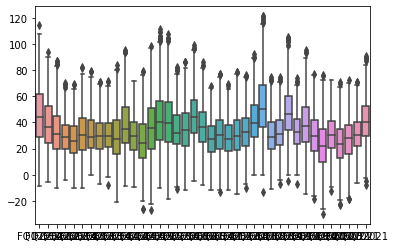

In [ ]:
sns.boxplot(data = df0.iloc[:, 2:])

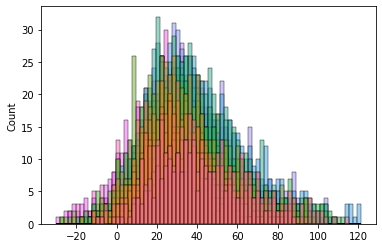

In [ ]:
sns.histplot(data = df0.iloc[:, 2:], legend = False)

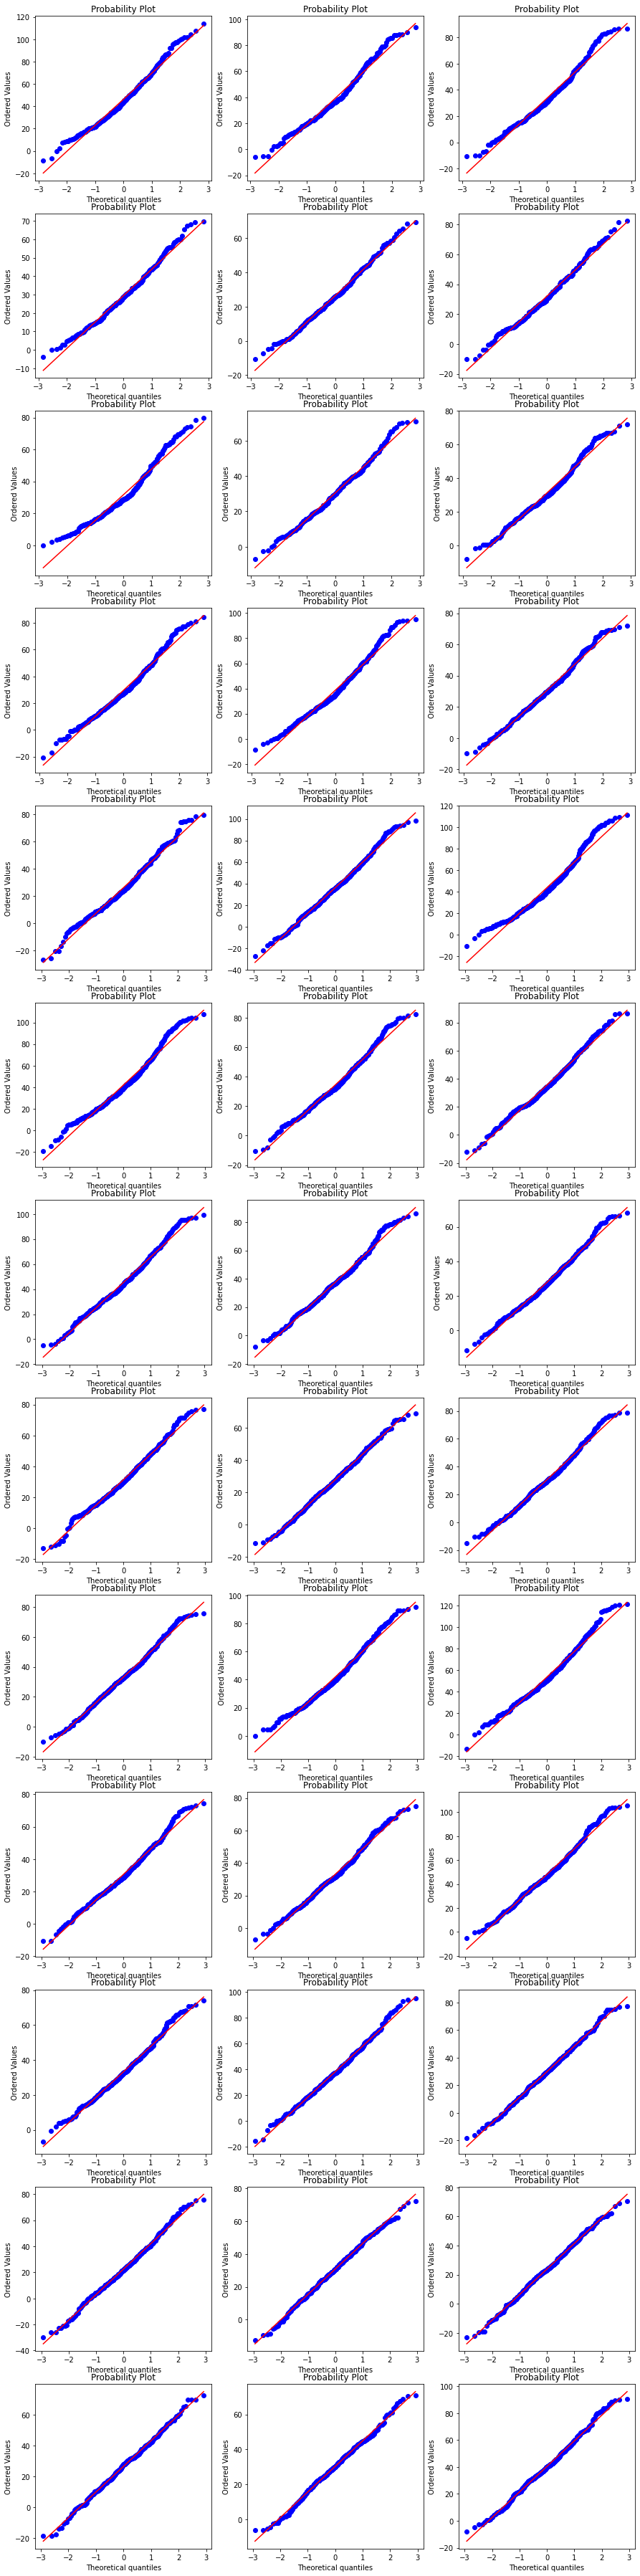

In [ ]:
fig = plt.figure(figsize = (15, 65))
for i, e in enumerate(list(df0.columns[2:])):
  df_list = df0[e].dropna()
  df_list = np.array(df_list, dtype = 'float32')
  ax = fig.add_subplot(13, 3, i + 1)
  stats.probplot(df_list, dist = stats.norm, plot = ax)
plt.show()

In [ ]:
for i in list(df0.columns[2:]):
  df_list = df0[i].dropna()
  _, pval = stats.normaltest(df_list)
  print(f'{i} 분기의 pval : {pval}')
  normal_test(pval)

FQ12012 분기의 pval : 0.0054841916035738595
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ22012 분기의 pval : 0.004107288113557544
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ32012 분기의 pval : 0.0025365257912813217
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ42012 분기의 pval : 0.027774066633994513
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ12013 분기의 pval : 0.1448966108904896
pval이 0.05 이상으로 데이터가 정규분포라는 귀무가설 채택
---------------------------------------------------------------
FQ22013 분기의 pval : 0.06731499625070261
pval이 0.05 이상으로 데이터가 정규분포라는 귀무가설 채택
---------------------------------------------------------------
FQ32013 분기의 pval : 1.1509644394765664e-05
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------

In [ ]:
for i in list(df0.columns[6:]):
  df_list = df0[i].dropna()
  _, pval = stats.jarque_bera(df_list)
  print(f'{i} 분기의 pval : {pval}')
  normal_test(pval)

FQ12013 분기의 pval : 0.1396155973554103
pval이 0.05 이상으로 데이터가 정규분포라는 귀무가설 채택
---------------------------------------------------------------
FQ22013 분기의 pval : 0.06321419733575373
pval이 0.05 이상으로 데이터가 정규분포라는 귀무가설 채택
---------------------------------------------------------------
FQ32013 분기의 pval : 1.9960273712760213e-06
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ42013 분기의 pval : 0.11918378565234178
pval이 0.05 이상으로 데이터가 정규분포라는 귀무가설 채택
---------------------------------------------------------------
FQ12014 분기의 pval : 0.021503686139280442
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ22014 분기의 pval : 0.003103781756465418
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ32014 분기의 pval : 0.0005122971595938886
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ420

In [ ]:
df0.to_excel('/content/drive/MyDrive/가공후/AF_UPSIDE_READY.xlsx', index = False)

## UPSIDE_STDDEV

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/UPSIDE_STDDEV_python.xlsx')
for i, e in enumerate(df['Symbol']):
  if e in kosdaq_list:
    df['Symbol'][i] = 'KOSDAQ:' + e
  elif e in kose_list:
    df['Symbol'][i] = 'KOSE:' + e
df = df[df['Symbol'].str.contains(':', na = False)]
df = df.sort_values(by = 'Symbol', ascending = True)
df.to_excel('/content/drive/MyDrive/UPSIDE_STDDEV_processing.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df

,Symbol,Symbol Name,Kind,Item,Item Name,Frequency,2011-09-30 00:00:00,2011-12-31 00:00:00,2012-03-31 00:00:00,2012-06-30 00:00:00,2012-09-30 00:00:00,2012-12-31 00:00:00,2013-03-31 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-12-31 00:00:00,2014-03-31 00:00:00,2014-06-30 00:00:00,2014-09-30 00:00:00,2014-12-31 00:00:00,2015-03-31 00:00:00,2015-06-30 00:00:00,2015-09-30 00:00:00,2015-12-31 00:00:00,2016-03-31 00:00:00,2016-06-30 00:00:00,2016-09-30 00:00:00,2016-12-31 00:00:00,2017-03-31 00:00:00,2017-06-30 00:00:00,2017-09-30 00:00:00,2017-12-31 00:00:00,2018-03-31 00:00:00,2018-06-30 00:00:00,2018-09-30 00:00:00,2018-12-31 00:00:00,2019-03-31 00:00:00,2019-06-30 00:00:00,2019-09-30 00:00:00,2019-12-31 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00,2021-12-31 00:00:00,2022-01-28 00:00:00
307,KOSDAQ:A000250,삼천당제약,CON,F730021240,적정주가 표준편차 (E3),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,707.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2546.0,0.0,11597.0,5657.0,3536.0,0.0,0.0,0.0,8485.0,NaN,NaN,0.0,NaN,NaN,NaN
1463,KOSDAQ:A000440,중앙에너비스,CON,F730021240,적정주가 표준편차 (E3),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2062,KOSDAQ:A001000,신라섬유,CON,F730021240,적정주가 표준편차 (E3),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1313,KOSDAQ:A001540,안국약품,CON,F730021240,적정주가 표준편차 (E3),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,9352.0,0.0,0.0,4031.0,707.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1905,KOSDAQ:A001810,무림SP,CON,F730021240,적정주가 표준편차 (E3),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,KOSE:A381970,케이카,CON,F730021240,적정주가 표준편차 (E3),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9452.0,8016.0
54,KOSE:A383220,F&F,CON,F730021240,적정주가 표준편차 (E3),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34641.0,71686.0,77753.0,73340.0
340,KOSE:A383800,LX홀딩스,CON,F730021240,적정주가 표준편차 (E3),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,KOSE:A402340,SK스퀘어,CON,F730021240,적정주가 표준편차 (E3),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


## TRADING_VALUE

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/가공전/TRADING_VALUE_python.xlsx')
df

,Symbol,Symbol Name,Kind,Item,Item Name,Frequency,2011-09-30 00:00:00,2011-12-31 00:00:00,2012-03-31 00:00:00,2012-06-30 00:00:00,2012-09-30 00:00:00,2012-12-31 00:00:00,2013-03-31 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-12-31 00:00:00,2014-03-31 00:00:00,2014-06-30 00:00:00,2014-09-30 00:00:00,2014-12-31 00:00:00,2015-03-31 00:00:00,2015-06-30 00:00:00,2015-09-30 00:00:00,2015-12-31 00:00:00,2016-03-31 00:00:00,2016-06-30 00:00:00,2016-09-30 00:00:00,2016-12-31 00:00:00,2017-03-31 00:00:00,2017-06-30 00:00:00,2017-09-30 00:00:00,2017-12-31 00:00:00,2018-03-31 00:00:00,2018-06-30 00:00:00,2018-09-30 00:00:00,2018-12-31 00:00:00,2019-03-31 00:00:00,2019-06-30 00:00:00,2019-09-30 00:00:00,2019-12-31 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00,2021-12-31 00:00:00,2022-01-28 00:00:00
0,A005930,삼성전자,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,2.009642e+13,2.252908e+13,2.260581e+13,2.649323e+13,2.856131e+13,2.270128e+13,2.404651e+13,2.651269e+13,2.189429e+13,1.794321e+13,1.950121e+13,2.045315e+13,1.873442e+13,2.018539e+13,1.931789e+13,1.845136e+13,1.964675e+13,1.923574e+13,1.566944e+13,2.088735e+13,2.295036e+13,2.635608e+13,2.829593e+13,3.254815e+13,3.521090e+13,3.333586e+13,4.551310e+13,4.174985e+13,2.792047e+13,2.907631e+13,3.160843e+13,2.998838e+13,2.730231e+13,3.580479e+13,8.213402e+13,6.673226e+13,7.199330e+13,9.030780e+13,1.344854e+14,8.655875e+13,8.177426e+13,7.038280e+13,21353687791872
1,A373220,LG에너지솔루션,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10260318422500
2,A000660,SK하이닉스,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,1.869514e+13,1.176155e+13,1.211294e+13,9.744954e+12,8.105155e+12,6.969199e+12,7.040157e+12,8.411569e+12,1.071931e+13,9.598192e+12,8.777299e+12,8.188612e+12,1.054075e+13,6.368212e+12,7.503207e+12,8.828129e+12,9.949936e+12,7.412776e+12,5.354665e+12,6.669456e+12,6.570935e+12,7.479529e+12,1.263682e+13,1.132905e+13,1.844686e+13,2.239193e+13,2.122309e+13,1.928708e+13,1.776844e+13,1.468555e+13,1.495081e+13,1.553144e+13,1.302841e+13,1.497524e+13,2.496713e+13,2.241228e+13,1.997788e+13,2.327523e+13,4.481091e+13,2.846274e+13,2.639068e+13,2.560750e+13,11044063809348
3,A035420,NAVER,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,3.595674e+12,3.167423e+12,2.523436e+12,2.542466e+12,3.421625e+12,4.328477e+12,3.311833e+12,4.118547e+12,5.397883e+12,8.017018e+12,8.451314e+12,6.516143e+12,6.405909e+12,4.164650e+12,5.268730e+12,5.125870e+12,4.452954e+12,3.302993e+12,3.716285e+12,4.547121e+12,4.819722e+12,4.603575e+12,4.090461e+12,5.443661e+12,4.543126e+12,5.106549e+12,5.482370e+12,4.645419e+12,3.506280e+12,4.809495e+12,3.415868e+12,3.878125e+12,3.783484e+12,4.324512e+12,6.449798e+12,1.409445e+13,2.004997e+13,1.327473e+13,2.660122e+13,1.719199e+13,1.986918e+13,1.240114e+13,5105986376832
4,A207940,삼성바이오로직스,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.966381e+12,2.126245e+12,4.408066e+12,4.476081e+12,5.689508e+12,6.772356e+12,1.077070e+13,5.710878e+12,6.468081e+12,2.798087e+12,2.266105e+12,2.513969e+12,2.547878e+12,6.216964e+12,1.425564e+13,9.200995e+12,7.155904e+12,6.192411e+12,8.545186e+12,6.685048e+12,4.022862e+12,1216629545000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2327,A335870,IBKS제12호스팩,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.290961e+09,7.959881e+08,9.025804e+08,2.393571e+08,9.309664e+08,1.062034e+09,5.812950e+10,9.606565e+10,3.519024e+09,556728940
2328,A373340,유진스팩6호,SSC,S410006800,거래대금 (누계)(원),QUARTERLY

In [ ]:
for i, e in enumerate(df['Symbol']):
  if e in kosdaq_list:
    df['Symbol'][i] = 'KOSDAQ:' + e
  elif e in kose_list:
    df['Symbol'][i] = 'KOSE:' + e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df = df[df['Symbol'].str.contains(':', na = False)]
df = df.sort_values(by = 'Symbol', ascending = True)
df = df.reset_index()
df = df.iloc[:, 1:-4]
df

,Symbol,Symbol Name,Kind,Item,Item Name,Frequency,2011-09-30 00:00:00,2011-12-31 00:00:00,2012-03-31 00:00:00,2012-06-30 00:00:00,2012-09-30 00:00:00,2012-12-31 00:00:00,2013-03-31 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-12-31 00:00:00,2014-03-31 00:00:00,2014-06-30 00:00:00,2014-09-30 00:00:00,2014-12-31 00:00:00,2015-03-31 00:00:00,2015-06-30 00:00:00,2015-09-30 00:00:00,2015-12-31 00:00:00,2016-03-31 00:00:00,2016-06-30 00:00:00,2016-09-30 00:00:00,2016-12-31 00:00:00,2017-03-31 00:00:00,2017-06-30 00:00:00,2017-09-30 00:00:00,2017-12-31 00:00:00,2018-03-31 00:00:00,2018-06-30 00:00:00,2018-09-30 00:00:00,2018-12-31 00:00:00,2019-03-31 00:00:00,2019-06-30 00:00:00,2019-09-30 00:00:00,2019-12-31 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00
0,KOSDAQ:A000250,삼천당제약,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,1.513560e+11,4.848693e+10,5.650365e+10,8.007374e+09,1.441953e+11,1.469378e+11,6.833432e+10,3.271740e+11,1.813839e+11,7.905069e+10,1.444599e+11,2.157486e+11,3.021697e+11,5.716386e+11,3.635268e+11,3.929628e+11,3.426647e+11,6.690416e+10,7.428077e+10,1.871509e+11,1.188231e+11,2.857885e+11,3.283158e+11,2.115259e+11,1.707624e+11,3.841928e+11,2.039541e+12,1.340727e+12,9.900687e+11,7.253007e+11,9.069075e+11,4.870379e+11,3.701140e+11,3.138369e+11,1.097655e+12,1.155927e+12,1.736249e+12,3.977725e+12,1.675770e+12
1,KOSDAQ:A000440,중앙에너비스,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,1.178060e+09,1.205994e+09,1.728996e+09,8.585842e+08,9.973746e+08,1.056715e+09,1.185196e+10,2.517562e+09,1.827824e+10,4.433901e+09,1.292510e+09,3.991879e+09,6.325649e+09,1.741358e+09,1.903978e+10,7.515390e+09,1.966790e+09,1.847775e+09,8.284089e+08,1.414437e+09,1.598095e+09,2.014028e+09,1.230234e+09,1.588009e+09,7.453344e+08,6.802657e+08,1.687729e+09,1.817293e+09,3.047403e+10,1.361478e+10,1.314094e+10,1.018598e+11,6.579742e+10,7.033264e+10,3.048144e+11,1.199107e+11,1.971404e+10,4.366681e+10,1.182414e+11
2,KOSDAQ:A001000,신라섬유,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,1.673777e+09,1.701999e+09,6.045926e+09,3.700014e+09,4.943384e+09,8.111135e+08,4.111188e+08,9.831085e+08,3.004240e+08,2.146133e+08,2.304519e+08,3.243899e+08,6.089989e+08,2.456484e+08,3.100976e+11,2.981706e+11,7.526849e+10,3.802102e+10,4.238589e+10,1.143199e+11,3.961122e+10,2.271995e+10,1.269629e+10,9.823968e+09,7.058739e+11,2.581478e+11,4.438707e+11,2.745020e+11,3.721473e+10,5.483393e+10,6.317532e+09,3.313087e+10,8.609304e+10,7.888037e+10,5.208484e+10,1.628536e+11,9.898785e+10,4.017334e+11,1.034345e+12
3,KOSDAQ:A001540,안국약품,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,1.663665e+10,6.573715e+09,1.474065e+10,3.052335e+09,5.797478e+09,2.105625e+10,1.371107e+10,4.481802e+10,1.521948e+10,6.282764e+09,7.143613e+10,3.266032e+10,9.167974e+10,8.540979e+10,1.324041e+11,4.326551e+11,3.266190e+11,1.431081e+11,9.692435e+10,3.732684e+11,7.906218e+10,3.170806e+10,1.736707e+10,3.418252e+10,2.325574e+10,3.431331e+10,1.067082e+11,5.348278e+10,4.524818e+10,2.981269e+10,9.237917e+10,4.035850e+10,3.046469e+11,5.059212e+10,4.266085e+10,3.640851e+11,4.466829e+11,7.379879e+10,3.195342e+11
4,KOSDAQ:A001810,무림SP,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,3.983927e+09,3.353481e+09,7.028045e+09,2.023396e+09,1.769831e+10,2.215533e+11,4.007442e+10,4.517863e+10,9.131613e+09,1.851171e+10,2.506658e+10,3.979179e+10,3.306251e+10,1.623251e+10,1.459601e+10,1.505273e+11,1.072388e+11,1.589312e+10,2.133991e+10,1.015425e+10,1.832338e+10,9.934937e+09,8.814578e+09,3.347558e+10,5.807584e+09,3.379436e+09,1.236436e+10,3.672150e+10,8.826153e+09,3.519735e+09,5.638791e+09,2.237426e+10,3.232147e+09,2.337230e+09,9.212030e+10,1.248501e+10,2.144595e+10,3.706081e+11,3.563495e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,KOSE:A381970,케이카,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
quarter_dict = {}
k = 6
for i in range(2012, 2022):
  for j in range(1, 5):
    e = f'FQ{j}{i}'
    if e == 'FQ42021':
      break
    quarter_dict[df.columns[k]] = e
    k = k + 1
df = df.rename(columns = quarter_dict)
df

,Symbol,Symbol Name,Kind,Item,Item Name,Frequency,FQ12012,FQ22012,FQ32012,FQ42012,FQ12013,FQ22013,FQ32013,FQ42013,FQ12014,FQ22014,FQ32014,FQ42014,FQ12015,FQ22015,FQ32015,FQ42015,FQ12016,FQ22016,FQ32016,FQ42016,FQ12017,FQ22017,FQ32017,FQ42017,FQ12018,FQ22018,FQ32018,FQ42018,FQ12019,FQ22019,FQ32019,FQ42019,FQ12020,FQ22020,FQ32020,FQ42020,FQ12021,FQ22021,FQ32021
0,KOSDAQ:A000250,삼천당제약,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,1.513560e+11,4.848693e+10,5.650365e+10,8.007374e+09,1.441953e+11,1.469378e+11,6.833432e+10,3.271740e+11,1.813839e+11,7.905069e+10,1.444599e+11,2.157486e+11,3.021697e+11,5.716386e+11,3.635268e+11,3.929628e+11,3.426647e+11,6.690416e+10,7.428077e+10,1.871509e+11,1.188231e+11,2.857885e+11,3.283158e+11,2.115259e+11,1.707624e+11,3.841928e+11,2.039541e+12,1.340727e+12,9.900687e+11,7.253007e+11,9.069075e+11,4.870379e+11,3.701140e+11,3.138369e+11,1.097655e+12,1.155927e+12,1.736249e+12,3.977725e+12,1.675770e+12
1,KOSDAQ:A000440,중앙에너비스,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,1.178060e+09,1.205994e+09,1.728996e+09,8.585842e+08,9.973746e+08,1.056715e+09,1.185196e+10,2.517562e+09,1.827824e+10,4.433901e+09,1.292510e+09,3.991879e+09,6.325649e+09,1.741358e+09,1.903978e+10,7.515390e+09,1.966790e+09,1.847775e+09,8.284089e+08,1.414437e+09,1.598095e+09,2.014028e+09,1.230234e+09,1.588009e+09,7.453344e+08,6.802657e+08,1.687729e+09,1.817293e+09,3.047403e+10,1.361478e+10,1.314094e+10,1.018598e+11,6.579742e+10,7.033264e+10,3.048144e+11,1.199107e+11,1.971404e+10,4.366681e+10,1.182414e+11
2,KOSDAQ:A001000,신라섬유,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,1.673777e+09,1.701999e+09,6.045926e+09,3.700014e+09,4.943384e+09,8.111135e+08,4.111188e+08,9.831085e+08,3.004240e+08,2.146133e+08,2.304519e+08,3.243899e+08,6.089989e+08,2.456484e+08,3.100976e+11,2.981706e+11,7.526849e+10,3.802102e+10,4.238589e+10,1.143199e+11,3.961122e+10,2.271995e+10,1.269629e+10,9.823968e+09,7.058739e+11,2.581478e+11,4.438707e+11,2.745020e+11,3.721473e+10,5.483393e+10,6.317532e+09,3.313087e+10,8.609304e+10,7.888037e+10,5.208484e+10,1.628536e+11,9.898785e+10,4.017334e+11,1.034345e+12
3,KOSDAQ:A001540,안국약품,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,1.663665e+10,6.573715e+09,1.474065e+10,3.052335e+09,5.797478e+09,2.105625e+10,1.371107e+10,4.481802e+10,1.521948e+10,6.282764e+09,7.143613e+10,3.266032e+10,9.167974e+10,8.540979e+10,1.324041e+11,4.326551e+11,3.266190e+11,1.431081e+11,9.692435e+10,3.732684e+11,7.906218e+10,3.170806e+10,1.736707e+10,3.418252e+10,2.325574e+10,3.431331e+10,1.067082e+11,5.348278e+10,4.524818e+10,2.981269e+10,9.237917e+10,4.035850e+10,3.046469e+11,5.059212e+10,4.266085e+10,3.640851e+11,4.466829e+11,7.379879e+10,3.195342e+11
4,KOSDAQ:A001810,무림SP,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,3.983927e+09,3.353481e+09,7.028045e+09,2.023396e+09,1.769831e+10,2.215533e+11,4.007442e+10,4.517863e+10,9.131613e+09,1.851171e+10,2.506658e+10,3.979179e+10,3.306251e+10,1.623251e+10,1.459601e+10,1.505273e+11,1.072388e+11,1.589312e+10,2.133991e+10,1.015425e+10,1.832338e+10,9.934937e+09,8.814578e+09,3.347558e+10,5.807584e+09,3.379436e+09,1.236436e+10,3.672150e+10,8.826153e+09,3.519735e+09,5.638791e+09,2.237426e+10,3.232147e+09,2.337230e+09,9.212030e+10,1.248501e+10,2.144595e+10,3.706081e+11,3.563495e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,KOSE:A381970,케이카,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2291,KOSE:A383220,F&F,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2292,KOSE:A383800,LX홀딩스,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
df = df[df['Symbol'].isin(not_financial_list)]
df = df.rename(columns = {'Symbol' : 'Ticker'})
df = df.reset_index(drop = True)
df

,Ticker,Symbol Name,Kind,Item,Item Name,Frequency,FQ12012,FQ22012,FQ32012,FQ42012,FQ12013,FQ22013,FQ32013,FQ42013,FQ12014,FQ22014,FQ32014,FQ42014,FQ12015,FQ22015,FQ32015,FQ42015,FQ12016,FQ22016,FQ32016,FQ42016,FQ12017,FQ22017,FQ32017,FQ42017,FQ12018,FQ22018,FQ32018,FQ42018,FQ12019,FQ22019,FQ32019,FQ42019,FQ12020,FQ22020,FQ32020,FQ42020,FQ12021,FQ22021,FQ32021
0,KOSDAQ:A000250,삼천당제약,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,1.513560e+11,4.848693e+10,5.650365e+10,8.007374e+09,1.441953e+11,1.469378e+11,6.833432e+10,3.271740e+11,1.813839e+11,7.905069e+10,1.444599e+11,2.157486e+11,3.021697e+11,5.716386e+11,3.635268e+11,3.929628e+11,3.426647e+11,6.690416e+10,7.428077e+10,1.871509e+11,1.188231e+11,2.857885e+11,3.283158e+11,2.115259e+11,1.707624e+11,3.841928e+11,2.039541e+12,1.340727e+12,9.900687e+11,7.253007e+11,9.069075e+11,4.870379e+11,3.701140e+11,3.138369e+11,1.097655e+12,1.155927e+12,1.736249e+12,3.977725e+12,1.675770e+12
1,KOSDAQ:A000440,중앙에너비스,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,1.178060e+09,1.205994e+09,1.728996e+09,8.585842e+08,9.973746e+08,1.056715e+09,1.185196e+10,2.517562e+09,1.827824e+10,4.433901e+09,1.292510e+09,3.991879e+09,6.325649e+09,1.741358e+09,1.903978e+10,7.515390e+09,1.966790e+09,1.847775e+09,8.284089e+08,1.414437e+09,1.598095e+09,2.014028e+09,1.230234e+09,1.588009e+09,7.453344e+08,6.802657e+08,1.687729e+09,1.817293e+09,3.047403e+10,1.361478e+10,1.314094e+10,1.018598e+11,6.579742e+10,7.033264e+10,3.048144e+11,1.199107e+11,1.971404e+10,4.366681e+10,1.182414e+11
2,KOSDAQ:A001000,신라섬유,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,1.673777e+09,1.701999e+09,6.045926e+09,3.700014e+09,4.943384e+09,8.111135e+08,4.111188e+08,9.831085e+08,3.004240e+08,2.146133e+08,2.304519e+08,3.243899e+08,6.089989e+08,2.456484e+08,3.100976e+11,2.981706e+11,7.526849e+10,3.802102e+10,4.238589e+10,1.143199e+11,3.961122e+10,2.271995e+10,1.269629e+10,9.823968e+09,7.058739e+11,2.581478e+11,4.438707e+11,2.745020e+11,3.721473e+10,5.483393e+10,6.317532e+09,3.313087e+10,8.609304e+10,7.888037e+10,5.208484e+10,1.628536e+11,9.898785e+10,4.017334e+11,1.034345e+12
3,KOSDAQ:A001540,안국약품,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,1.663665e+10,6.573715e+09,1.474065e+10,3.052335e+09,5.797478e+09,2.105625e+10,1.371107e+10,4.481802e+10,1.521948e+10,6.282764e+09,7.143613e+10,3.266032e+10,9.167974e+10,8.540979e+10,1.324041e+11,4.326551e+11,3.266190e+11,1.431081e+11,9.692435e+10,3.732684e+11,7.906218e+10,3.170806e+10,1.736707e+10,3.418252e+10,2.325574e+10,3.431331e+10,1.067082e+11,5.348278e+10,4.524818e+10,2.981269e+10,9.237917e+10,4.035850e+10,3.046469e+11,5.059212e+10,4.266085e+10,3.640851e+11,4.466829e+11,7.379879e+10,3.195342e+11
4,KOSDAQ:A001810,무림SP,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,3.983927e+09,3.353481e+09,7.028045e+09,2.023396e+09,1.769831e+10,2.215533e+11,4.007442e+10,4.517863e+10,9.131613e+09,1.851171e+10,2.506658e+10,3.979179e+10,3.306251e+10,1.623251e+10,1.459601e+10,1.505273e+11,1.072388e+11,1.589312e+10,2.133991e+10,1.015425e+10,1.832338e+10,9.934937e+09,8.814578e+09,3.347558e+10,5.807584e+09,3.379436e+09,1.236436e+10,3.672150e+10,8.826153e+09,3.519735e+09,5.638791e+09,2.237426e+10,3.232147e+09,2.337230e+09,9.212030e+10,1.248501e+10,2.144595e+10,3.706081e+11,3.563495e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,KOSE:A381970,케이카,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2177,KOSE:A383220,F&F,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,KOSE:A383800,LX홀딩스,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
for i in list(df.columns[6:]):
  Q3 = df[i].quantile(q = 0.75)
  Q1 = df[i].quantile(q = 0.25)
  IQR= Q3 - Q1
  condition = (df[i] > (Q3 + IQR * 1.5)) | (df[i] < (Q1 - IQR * 1.5))
  df[i][condition] = np.NaN
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Ticker,Symbol Name,Kind,Item,Item Name,Frequency,FQ12012,FQ22012,FQ32012,FQ42012,FQ12013,FQ22013,FQ32013,FQ42013,FQ12014,FQ22014,FQ32014,FQ42014,FQ12015,FQ22015,FQ32015,FQ42015,FQ12016,FQ22016,FQ32016,FQ42016,FQ12017,FQ22017,FQ32017,FQ42017,FQ12018,FQ22018,FQ32018,FQ42018,FQ12019,FQ22019,FQ32019,FQ42019,FQ12020,FQ22020,FQ32020,FQ42020,FQ12021,FQ22021,FQ32021
0,KOSDAQ:A000250,삼천당제약,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,1.513560e+11,4.848693e+10,5.650365e+10,8.007374e+09,1.441953e+11,1.469378e+11,6.833432e+10,3.271740e+11,1.813839e+11,7.905069e+10,1.444599e+11,2.157486e+11,3.021697e+11,NaN,3.635268e+11,3.929628e+11,3.426647e+11,6.690416e+10,7.428077e+10,1.871509e+11,1.188231e+11,2.857885e+11,3.283158e+11,2.115259e+11,1.707624e+11,3.841928e+11,NaN,NaN,NaN,NaN,NaN,4.870379e+11,3.701140e+11,3.138369e+11,NaN,NaN,NaN,NaN,NaN
1,KOSDAQ:A000440,중앙에너비스,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,1.178060e+09,1.205994e+09,1.728996e+09,8.585842e+08,9.973746e+08,1.056715e+09,1.185196e+10,2.517562e+09,1.827824e+10,4.433901e+09,1.292510e+09,3.991879e+09,6.325649e+09,1.741358e+09,1.903978e+10,7.515390e+09,1.966790e+09,1.847775e+09,8.284089e+08,1.414437e+09,1.598095e+09,2.014028e+09,1.230234e+09,1.588009e+09,7.453344e+08,6.802657e+08,1.687729e+09,1.817293e+09,3.047403e+10,1.361478e+10,1.314094e+10,1.018598e+11,6.579742e+10,7.033264e+10,3.048144e+11,1.199107e+11,1.971404e+10,4.366681e+10,1.182414e+11
2,KOSDAQ:A001000,신라섬유,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,1.673777e+09,1.701999e+09,6.045926e+09,3.700014e+09,4.943384e+09,8.111135e+08,4.111188e+08,9.831085e+08,3.004240e+08,2.146133e+08,2.304519e+08,3.243899e+08,6.089989e+08,2.456484e+08,3.100976e+11,2.981706e+11,7.526849e+10,3.802102e+10,4.238589e+10,1.143199e+11,3.961122e+10,2.271995e+10,1.269629e+10,9.823968e+09,NaN,2.581478e+11,4.438707e+11,2.745020e+11,3.721473e+10,5.483393e+10,6.317532e+09,3.313087e+10,8.609304e+10,7.888037e+10,5.208484e+10,1.628536e+11,9.898785e+10,4.017334e+11,1.034345e+12
3,KOSDAQ:A001540,안국약품,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,1.663665e+10,6.573715e+09,1.474065e+10,3.052335e+09,5.797478e+09,2.105625e+10,1.371107e+10,4.481802e+10,1.521948e+10,6.282764e+09,7.143613e+10,3.266032e+10,9.167974e+10,8.540979e+10,1.324041e+11,4.326551e+11,3.266190e+11,1.431081e+11,9.692435e+10,3.732684e+11,7.906218e+10,3.170806e+10,1.736707e+10,3.418252e+10,2.325574e+10,3.431331e+10,1.067082e+11,5.348278e+10,4.524818e+10,2.981269e+10,9.237917e+10,4.035850e+10,3.046469e+11,5.059212e+10,4.266085e+10,3.640851e+11,4.466829e+11,7.379879e+10,3.195342e+11
4,KOSDAQ:A001810,무림SP,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,3.983927e+09,3.353481e+09,7.028045e+09,2.023396e+09,1.769831e+10,2.215533e+11,4.007442e+10,4.517863e+10,9.131613e+09,1.851171e+10,2.506658e+10,3.979179e+10,3.306251e+10,1.623251e+10,1.459601e+10,1.505273e+11,1.072388e+11,1.589312e+10,2.133991e+10,1.015425e+10,1.832338e+10,9.934937e+09,8.814578e+09,3.347558e+10,5.807584e+09,3.379436e+09,1.236436e+10,3.672150e+10,8.826153e+09,3.519735e+09,5.638791e+09,2.237426e+10,3.232147e+09,2.337230e+09,9.212030e+10,1.248501e+10,2.144595e+10,3.706081e+11,3.563495e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,KOSE:A381970,케이카,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2177,KOSE:A383220,F&F,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,KOSE:A383800,LX홀딩스,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,KOSE:A402340,SK스퀘어,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,

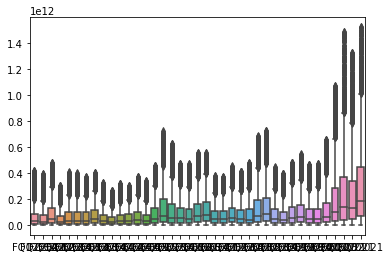

In [ ]:
sns.boxplot(data = df.iloc[:, 6:])

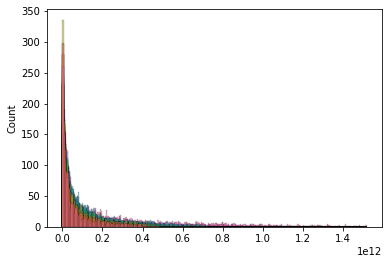

In [ ]:
sns.histplot(data = df.iloc[:, 6:], legend = False)

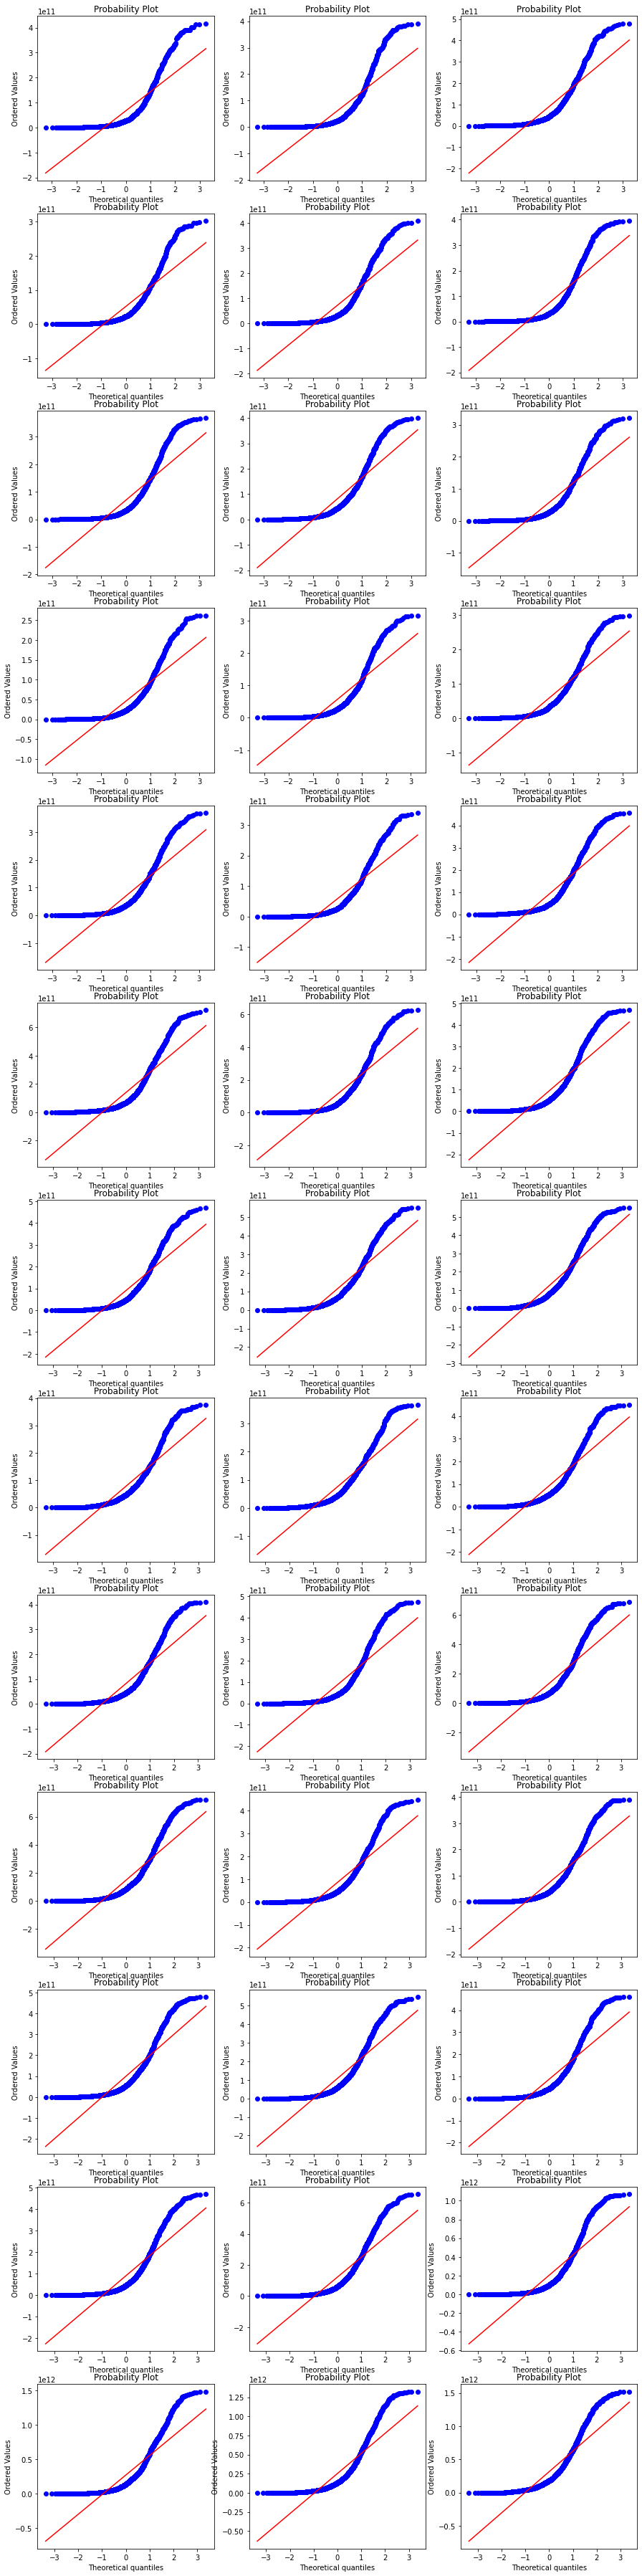

In [ ]:
fig = plt.figure(figsize = (15, 65))
for i, e in enumerate(list(df.columns[6:])):
  df_list = df[e].dropna()
  ax = fig.add_subplot(13, 3, i + 1)
  stats.probplot(df_list, dist = stats.norm, plot = ax)
plt.show()

In [ ]:
for i in list(df.columns[6:]):
  df_list = df[i].dropna()
  _, pval = stats.normaltest(df_list)
  print(f'{i} 분기의 pval : {pval}')
  normal_test(pval)

In [ ]:
for i in list(df.columns[6:]):
  df_list = df[i].dropna()
  _, pval = stats.jarque_bera(df_list)
  print(f'{i} 분기의 pval : {pval}')
  normal_test(pval)

In [ ]:
df.to_excel('/content/drive/MyDrive/가공후/ALL_LIQUIDITY_READY*.xlsx', index = False)

In [ ]:
for i in list(df.columns[6:]):
  df_list_rev = df[i]
  for j, k in enumerate(df_list_rev):
    df_list_rev[j] = np.log(k)
  df[i] = np.array(df_list_rev, dtype = np.float64)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


,Ticker,Symbol Name,Kind,Item,Item Name,Frequency,FQ12012,FQ22012,FQ32012,FQ42012,FQ12013,FQ22013,FQ32013,FQ42013,FQ12014,FQ22014,FQ32014,FQ42014,FQ12015,FQ22015,FQ32015,FQ42015,FQ12016,FQ22016,FQ32016,FQ42016,FQ12017,FQ22017,FQ32017,FQ42017,FQ12018,FQ22018,FQ32018,FQ42018,FQ12019,FQ22019,FQ32019,FQ42019,FQ12020,FQ22020,FQ32020,FQ42020,FQ12021,FQ22021,FQ32021
0,KOSDAQ:A000250,삼천당제약,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,25.742901,24.604560,24.757571,22.803629,25.694434,25.713276,24.947678,26.513758,25.923882,25.093355,25.696268,26.097380,26.434255,27.071773,26.619119,26.696981,26.560018,24.926527,25.031118,25.955181,25.500902,26.378518,26.517242,26.077613,25.863539,26.674410,28.343746,27.924233,27.621040,27.309852,27.533306,26.911608,26.637077,26.472139,27.724197,27.775924,28.182748,29.011731,28.147294
1,KOSDAQ:A000440,중앙에너비스,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,20.887135,20.910570,21.270807,20.570795,20.720637,20.778431,23.195759,21.646557,23.628977,22.212546,20.979852,22.107528,22.567878,21.277931,23.669796,22.740219,21.399669,21.337248,20.535017,21.069998,21.192078,21.423402,20.930470,21.185747,20.429343,20.337994,21.246650,21.320614,24.140141,23.334422,23.298998,25.346863,24.909847,24.976502,26.442969,25.510014,23.704597,24.499854,25.495994
2,KOSDAQ:A001000,신라섬유,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,21.238349,21.255069,22.522650,22.031603,22.321316,20.513918,19.834393,20.706230,19.520705,19.184348,19.255553,19.597457,20.227327,19.319412,26.460153,26.420932,25.044327,24.361405,24.470081,25.462266,24.402378,23.846509,23.264576,23.008091,27.282702,26.276798,26.818799,26.338224,24.339970,24.727575,22.566594,24.223731,25.178694,25.091198,24.676140,25.816117,25.318263,26.719054,27.664789
3,KOSDAQ:A001540,안국약품,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,23.534874,22.606345,23.413875,21.839173,22.480689,23.770463,23.341470,24.525876,23.445842,22.561076,24.992070,24.209427,25.241567,25.170727,25.609125,26.793207,26.512060,25.686866,25.297197,26.645563,25.093500,24.179837,23.577842,24.254980,23.869818,24.258799,25.393364,24.702626,24.535428,24.118200,25.249167,24.421068,26.442419,24.647062,24.476547,26.620654,26.825115,25.024608,26.490130
4,KOSDAQ:A001810,무림SP,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,22.105534,21.933265,22.673174,21.428043,23.596735,26.123929,24.414004,24.533890,22.935008,23.641669,23.944801,24.406927,24.221666,23.510282,23.404014,25.737410,25.398324,23.489152,23.783845,23.041158,23.631444,23.019323,22.899673,24.234082,22.482431,21.940975,23.238084,24.326628,22.900985,21.981652,22.452935,23.831177,21.896412,21.572232,25.246361,23.247795,23.788802,26.638411,26.599178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,KOSE:A381970,케이카,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2177,KOSE:A383220,F&F,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,KOSE:A383800,LX홀딩스,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,KOSE:A402340,SK스퀘어,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for i in list(df.columns[6:]):
  Q3 = df[i].quantile(q = 0.75)
  Q1 = df[i].quantile(q = 0.25)
  IQR= Q3 - Q1
  condition = (df[i] > (Q3 + IQR * 1.5)) | (df[i] < (Q1 - IQR * 1.5))
  df[i][condition] = np.NaN
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Ticker,Symbol Name,Kind,Item,Item Name,Frequency,FQ12012,FQ22012,FQ32012,FQ42012,FQ12013,FQ22013,FQ32013,FQ42013,FQ12014,FQ22014,FQ32014,FQ42014,FQ12015,FQ22015,FQ32015,FQ42015,FQ12016,FQ22016,FQ32016,FQ42016,FQ12017,FQ22017,FQ32017,FQ42017,FQ12018,FQ22018,FQ32018,FQ42018,FQ12019,FQ22019,FQ32019,FQ42019,FQ12020,FQ22020,FQ32020,FQ42020,FQ12021,FQ22021,FQ32021
0,KOSDAQ:A000250,삼천당제약,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,25.742901,24.604560,24.757571,22.803629,25.694434,25.713276,24.947678,26.513758,25.923882,25.093355,25.696268,26.097380,26.434255,27.071773,26.619119,26.696981,26.560018,24.926527,25.031118,25.955181,25.500902,26.378518,26.517242,26.077613,25.863539,26.674410,28.343746,27.924233,27.621040,27.309852,27.533306,26.911608,26.637077,26.472139,27.724197,27.775924,28.182748,29.011731,28.147294
1,KOSDAQ:A000440,중앙에너비스,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,20.887135,20.910570,21.270807,20.570795,20.720637,20.778431,23.195759,21.646557,23.628977,22.212546,20.979852,22.107528,22.567878,21.277931,23.669796,22.740219,21.399669,21.337248,20.535017,21.069998,21.192078,21.423402,20.930470,21.185747,20.429343,20.337994,21.246650,21.320614,24.140141,23.334422,23.298998,25.346863,24.909847,24.976502,26.442969,25.510014,23.704597,24.499854,25.495994
2,KOSDAQ:A001000,신라섬유,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,21.238349,21.255069,22.522650,22.031603,22.321316,20.513918,19.834393,20.706230,19.520705,19.184348,19.255553,NaN,20.227327,19.319412,26.460153,26.420932,25.044327,24.361405,24.470081,25.462266,24.402378,23.846509,23.264576,23.008091,27.282702,26.276798,26.818799,26.338224,24.339970,24.727575,22.566594,24.223731,25.178694,25.091198,24.676140,25.816117,25.318263,26.719054,27.664789
3,KOSDAQ:A001540,안국약품,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,23.534874,22.606345,23.413875,21.839173,22.480689,23.770463,23.341470,24.525876,23.445842,22.561076,24.992070,24.209427,25.241567,25.170727,25.609125,26.793207,26.512060,25.686866,25.297197,26.645563,25.093500,24.179837,23.577842,24.254980,23.869818,24.258799,25.393364,24.702626,24.535428,24.118200,25.249167,24.421068,26.442419,24.647062,24.476547,26.620654,26.825115,25.024608,26.490130
4,KOSDAQ:A001810,무림SP,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,22.105534,21.933265,22.673174,21.428043,23.596735,26.123929,24.414004,24.533890,22.935008,23.641669,23.944801,24.406927,24.221666,23.510282,23.404014,25.737410,25.398324,23.489152,23.783845,23.041158,23.631444,23.019323,22.899673,24.234082,22.482431,21.940975,23.238084,24.326628,22.900985,21.981652,22.452935,23.831177,21.896412,21.572232,25.246361,23.247795,23.788802,26.638411,26.599178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,KOSE:A381970,케이카,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2177,KOSE:A383220,F&F,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,KOSE:A383800,LX홀딩스,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,KOSE:A402340,SK스퀘어,SSC,S410006800,거래대금 (누계)(원),QUARTERLY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


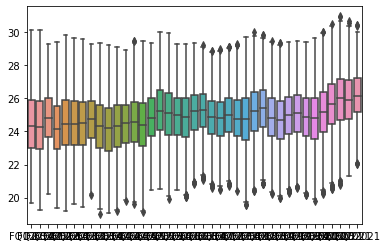

In [ ]:
sns.boxplot(data = df.iloc[:, 6:])

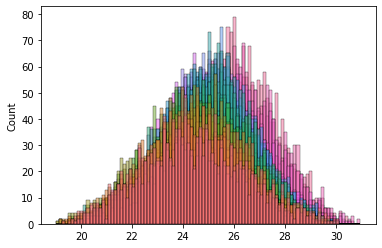

In [ ]:
sns.histplot(data = df.iloc[:, 6:], legend = False)

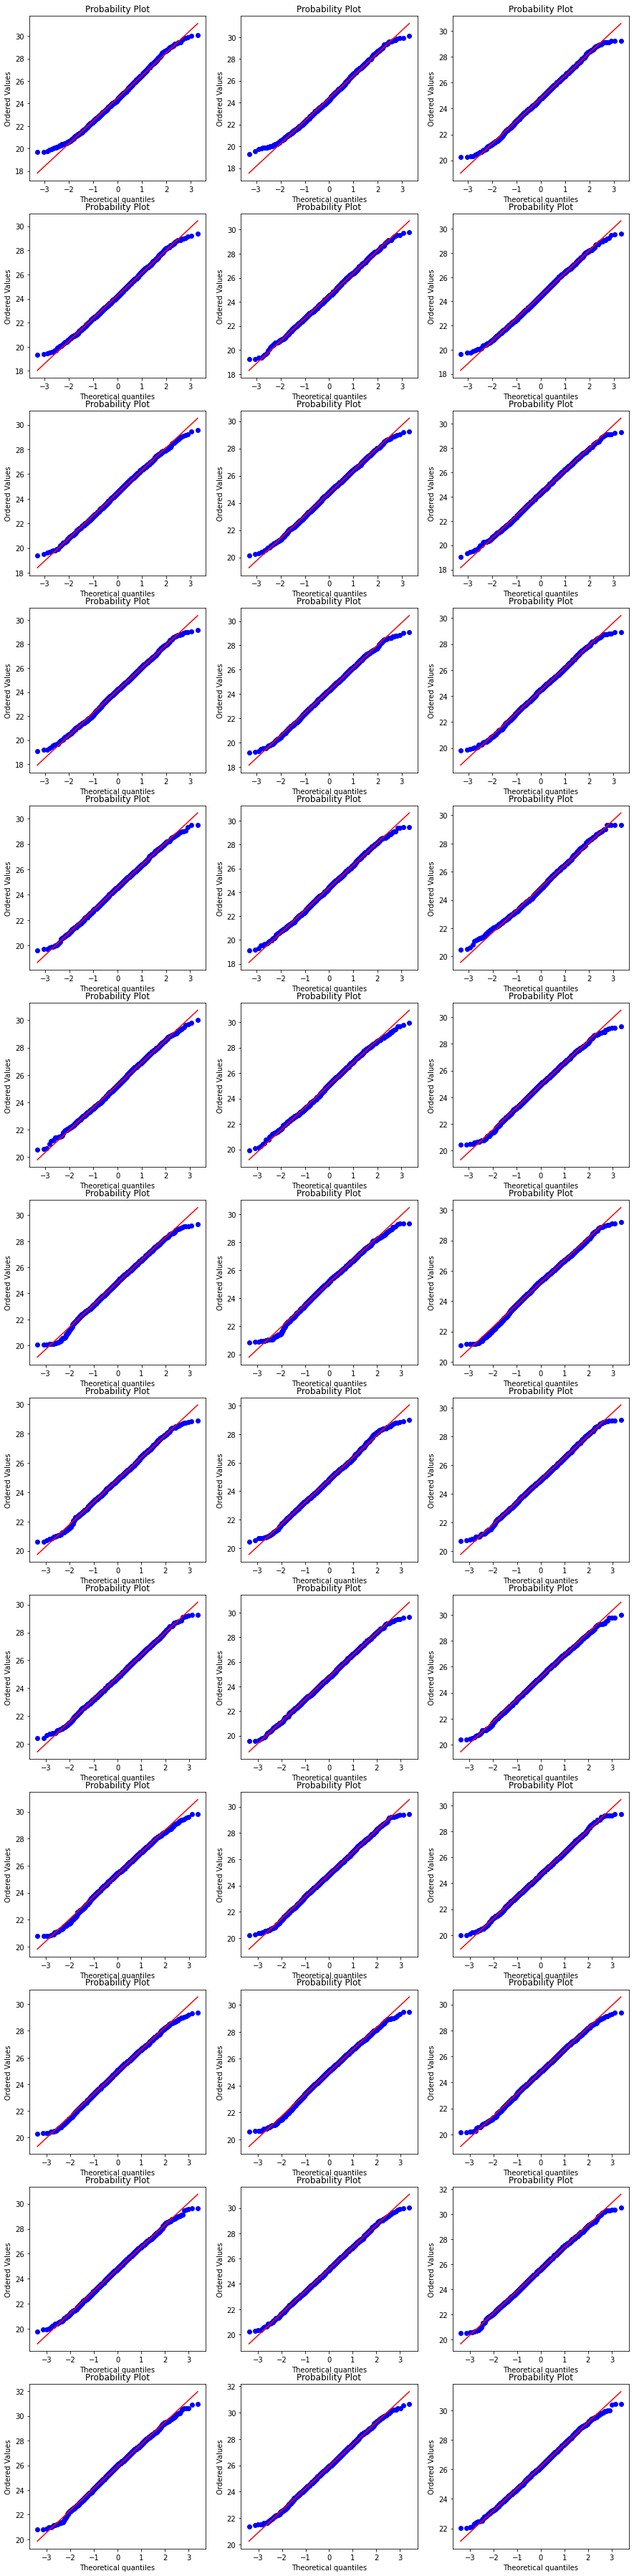

In [ ]:
fig = plt.figure(figsize = (15, 65))
for i, e in enumerate(list(df.columns[6:])):
  df_list = df[e].dropna()
  ax = fig.add_subplot(13, 3, i + 1)
  stats.probplot(df_list, dist = stats.norm, plot = ax)
plt.show()

In [ ]:
for i in list(df.columns[6:]):
  df_list = df[i].dropna()
  _, pval = stats.normaltest(df_list)
  print(f'{i} 분기의 pval : {pval}')
  normal_test(pval)

FQ12012 분기의 pval : 0.00015925271751674158
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ22012 분기의 pval : 2.0286717118133042e-05
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ32012 분기의 pval : 0.0621718525734162
pval이 0.05 이상으로 데이터가 정규분포라는 귀무가설 채택
---------------------------------------------------------------
FQ42012 분기의 pval : 0.008884037098251389
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ12013 분기의 pval : 0.07766881414096832
pval이 0.05 이상으로 데이터가 정규분포라는 귀무가설 채택
---------------------------------------------------------------
FQ22013 분기의 pval : 0.0003187753754470758
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ32013 분기의 pval : 0.005695599213799018
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
--------------------------------------------------------------

In [ ]:
for i in list(df.columns[6:]):
  df_list = df[i].dropna()
  _, pval = stats.jarque_bera(df_list)
  print(f'{i} 분기의 pval : {pval}')
  normal_test(pval)

FQ12012 분기의 pval : 0.0007913467026402499
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ22012 분기의 pval : 0.0003393506085802578
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ32012 분기의 pval : 0.11003489296195945
pval이 0.05 이상으로 데이터가 정규분포라는 귀무가설 채택
---------------------------------------------------------------
FQ42012 분기의 pval : 0.02645219504864793
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ12013 분기의 pval : 0.11821460238653392
pval이 0.05 이상으로 데이터가 정규분포라는 귀무가설 채택
---------------------------------------------------------------
FQ22013 분기의 pval : 0.005500126476705169
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
FQ32013 분기의 pval : 0.022690803062537013
pval이 0.05 미만으로 데이터가 정규분포가 아니라는 대립가설 채택
---------------------------------------------------------------
F

In [ ]:
df.to_excel('/content/drive/MyDrive/가공후/ALL_LIQUIDITY_READY.xlsx', index = False)

## RATING

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/RATING_python.xlsx')
for i, e in enumerate(df['Symbol']):
  if e in kosdaq_list:
    df['Symbol'][i] = 'KOSDAQ:' + e
  elif e in kose_list:
    df['Symbol'][i] = 'KOSE:' + e
df = df[df['Symbol'].str.contains(':', na = False)]
df = df.sort_values(by = 'Symbol', ascending = True)
df.to_excel('/content/drive/MyDrive/RATING_processing.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df

,Symbol,Symbol Name,Kind,Item,Item Name,Frequency,2011-09-30 00:00:00,2011-12-31 00:00:00,2012-03-31 00:00:00,2012-06-30 00:00:00,2012-09-30 00:00:00,2012-12-31 00:00:00,2013-03-31 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-12-31 00:00:00,2014-03-31 00:00:00,2014-06-30 00:00:00,2014-09-30 00:00:00,2014-12-31 00:00:00,2015-03-31 00:00:00,2015-06-30 00:00:00,2015-09-30 00:00:00,2015-12-31 00:00:00,2016-03-31 00:00:00,2016-06-30 00:00:00,2016-09-30 00:00:00,2016-12-31 00:00:00,2017-03-31 00:00:00,2017-06-30 00:00:00,2017-09-30 00:00:00,2017-12-31 00:00:00,2018-03-31 00:00:00,2018-06-30 00:00:00,2018-09-30 00:00:00,2018-12-31 00:00:00,2019-03-31 00:00:00,2019-06-30 00:00:00,2019-09-30 00:00:00,2019-12-31 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00,2021-12-31 00:00:00,2022-01-28 00:00:00
307,KOSDAQ:A000250,삼천당제약,CON,F730021100,투자의견점수 (E3)(포인트),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,4.0,4.00,4.0,4.0,NaN,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,4.5,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,4.0,NaN,NaN,NaN
1463,KOSDAQ:A000440,중앙에너비스,CON,F730021100,투자의견점수 (E3)(포인트),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2062,KOSDAQ:A001000,신라섬유,CON,F730021100,투자의견점수 (E3)(포인트),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1313,KOSDAQ:A001540,안국약품,CON,F730021100,투자의견점수 (E3)(포인트),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.00,4.0,4.0,4.0,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1905,KOSDAQ:A001810,무림SP,CON,F730021100,투자의견점수 (E3)(포인트),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,KOSE:A381970,케이카,CON,F730021100,투자의견점수 (E3)(포인트),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0
54,KOSE:A383220,F&F,CON,F730021100,투자의견점수 (E3)(포인트),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0
340,KOSE:A383800,LX홀딩스,CON,F730021100,투자의견점수 (E3)(포인트),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,KOSE:A402340,SK스퀘어,CON,F730021100,투자의견점수 (E3)(포인트),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0


## COVERAGE

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/COVERAGE_python.xlsx')
for i, e in enumerate(df['Symbol']):
  if e in kosdaq_list:
    df['Symbol'][i] = 'KOSDAQ:' + e
  elif e in kose_list:
    df['Symbol'][i] = 'KOSE:' + e
df = df[df['Symbol'].str.contains(':', na = False)]
df = df.sort_values(by = 'Symbol', ascending = True)
df.to_excel('/content/drive/MyDrive/COVERAGE_processing.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df

,Symbol,Symbol Name,Kind,Item,Item Name,Frequency,2011-09-30 00:00:00,2011-12-31 00:00:00,2012-03-31 00:00:00,2012-06-30 00:00:00,2012-09-30 00:00:00,2012-12-31 00:00:00,2013-03-31 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-12-31 00:00:00,2014-03-31 00:00:00,2014-06-30 00:00:00,2014-09-30 00:00:00,2014-12-31 00:00:00,2015-03-31 00:00:00,2015-06-30 00:00:00,2015-09-30 00:00:00,2015-12-31 00:00:00,2016-03-31 00:00:00,2016-06-30 00:00:00,2016-09-30 00:00:00,2016-12-31 00:00:00,2017-03-31 00:00:00,2017-06-30 00:00:00,2017-09-30 00:00:00,2017-12-31 00:00:00,2018-03-31 00:00:00,2018-06-30 00:00:00,2018-09-30 00:00:00,2018-12-31 00:00:00,2019-03-31 00:00:00,2019-06-30 00:00:00,2019-09-30 00:00:00,2019-12-31 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00,2021-12-31 00:00:00,2022-01-28 00:00:00
307,KOSDAQ:A000250,삼천당제약,CON,F730012910,추정기관수 (E3),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,1.0,1.0,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN
1463,KOSDAQ:A000440,중앙에너비스,CON,F730012910,추정기관수 (E3),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2062,KOSDAQ:A001000,신라섬유,CON,F730012910,추정기관수 (E3),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1313,KOSDAQ:A001540,안국약품,CON,F730012910,추정기관수 (E3),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1905,KOSDAQ:A001810,무림SP,CON,F730012910,추정기관수 (E3),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,KOSE:A381970,케이카,CON,F730012910,추정기관수 (E3),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,KOSE:A383220,F&F,CON,F730012910,추정기관수 (E3),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,10.0,11.0,12.0
340,KOSE:A383800,LX홀딩스,CON,F730012910,추정기관수 (E3),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,KOSE:A402340,SK스퀘어,CON,F730012910,추정기관수 (E3),FQ1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


## BETA_D_1Y

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/BETA_D_1Y_python.xlsx')
for i, e in enumerate(df['Symbol']):
  if e in kosdaq_list:
    df['Symbol'][i] = 'KOSDAQ:' + e
  elif e in kose_list:
    df['Symbol'][i] = 'KOSE:' + e
df = df[df['Symbol'].str.contains(':', na = False)]
df = df.sort_values(by = 'Symbol', ascending = True)
df.to_excel('/content/drive/MyDrive/BETA_D_1Y_processing.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df

,Symbol,Symbol Name,Kind,Item,Item Name,Frequency,2011-09-30 00:00:00,2011-12-31 00:00:00,2012-03-31 00:00:00,2012-06-30 00:00:00,2012-09-30 00:00:00,2012-12-31 00:00:00,2013-03-31 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-12-31 00:00:00,2014-03-31 00:00:00,2014-06-30 00:00:00,2014-09-30 00:00:00,2014-12-31 00:00:00,2015-03-31 00:00:00,2015-06-30 00:00:00,2015-09-30 00:00:00,2015-12-31 00:00:00,2016-03-31 00:00:00,2016-06-30 00:00:00,2016-09-30 00:00:00,2016-12-31 00:00:00,2017-03-31 00:00:00,2017-06-30 00:00:00,2017-09-30 00:00:00,2017-12-31 00:00:00,2018-03-31 00:00:00,2018-06-30 00:00:00,2018-09-30 00:00:00,2018-12-31 00:00:00,2019-03-31 00:00:00,2019-06-30 00:00:00,2019-09-30 00:00:00,2019-12-31 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00,2021-12-31 00:00:00,2022-01-28 00:00:00
307,KOSDAQ:A000250,삼천당제약,BTA,S41B0D1005,"베타 (D,1Yr)",DAILY,1.25107,1.21273,1.29303,1.31664,0.93477,0.97214,0.95810,1.27556,1.33363,1.39515,1.39733,1.13148,1.34438,1.50923,1.55570,1.51998,1.28708,1.14980,1.19093,1.19644,1.18602,1.17665,1.06829,1.19378,1.23801,1.06114,1.63035,1.69501,1.64719,1.78595,1.54912,1.49769,1.51693,1.48689,1.52697,1.43964,1.42635,1.43323,1.23410,1.28526,1.09768,1.12796,1.24818
1463,KOSDAQ:A000440,중앙에너비스,BTA,S41B0D1005,"베타 (D,1Yr)",DAILY,0.50039,0.43300,0.42526,0.46087,0.43436,0.68687,0.67771,0.54345,0.39075,0.26189,0.19779,-0.01553,-0.05621,0.01944,0.16295,0.26800,0.46540,0.51611,0.46042,0.48647,0.42168,0.36674,0.40906,0.26415,0.23793,-0.06957,-0.13187,-0.10816,-0.06558,0.28468,0.49884,0.59910,0.82787,0.74676,1.28032,1.35941,1.27940,1.23561,0.72542,0.24796,0.45433,0.18288,0.21373
2062,KOSDAQ:A001000,신라섬유,BTA,S41B0D1005,"베타 (D,1Yr)",DAILY,1.12169,0.96047,0.89615,0.79476,0.14569,0.15580,0.15431,-0.01627,0.15270,0.10134,0.17616,0.24410,0.03607,-0.05077,-0.32298,0.06728,0.92186,1.25953,1.23927,1.27683,1.18164,0.92586,1.12515,0.85631,0.84855,0.43187,0.63233,0.57766,0.59747,0.78016,0.71034,0.79976,0.67659,0.42369,0.94119,0.95068,1.05249,1.01289,0.42601,0.05243,-0.44629,-0.31046,-0.04921
1313,KOSDAQ:A001540,안국약품,BTA,S41B0D1005,"베타 (D,1Yr)",DAILY,0.44222,0.45849,0.50645,0.49314,0.31520,0.26187,0.20499,0.44163,0.65128,0.68253,0.91472,0.93434,0.93996,1.02417,0.83584,0.90560,1.36678,1.43172,1.42203,1.45659,1.30688,1.50905,1.68194,1.70738,1.48238,0.76274,0.68213,0.75906,0.75811,0.90996,0.97846,1.03365,0.98674,0.92970,0.97998,1.00533,1.09200,1.12919,1.18120,1.07260,0.95095,0.79880,0.84811
1905,KOSDAQ:A001810,무림SP,BTA,S41B0D1005,"베타 (D,1Yr)",DAILY,0.67492,0.57308,0.55886,0.57123,0.45794,0.35784,0.40071,0.62582,0.60093,0.86834,0.86068,0.76829,0.81895,0.86720,0.77217,0.56371,0.91042,0.96628,1.01606,1.08088,1.00764,0.89189,0.79140,0.64396,0.67819,0.34028,0.22977,0.24761,0.27744,0.47024,0.65431,0.69382,0.76728,0.70517,0.94512,0.92851,0.90575,0.90118,0.83150,0.96268,1.20578,1.41078,1.13165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,KOSE:A381970,케이카,BTA,S41B0D1005,"베타 (D,1Yr)",DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.04060,1.40547
54,KOSE:A383220,F&F,BTA,S41B0D1005,"베타 (D,1Yr)",DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.93219,0.29092,0.31601,0.62954
340,KOSE:A383800,LX홀딩스,BTA,S41B0D1005,"베타 (D,1Yr)",DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.65911,0.70636,0.89552,0.86879
49,KOSE:A402340,SK스퀘어,BTA,S41B0D1005,"베타 (D,1Yr)",DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## BETA_W_2Y

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/BETA_W_2Y_python.xlsx')
for i, e in enumerate(df['Symbol']):
  if e in kosdaq_list:
    df['Symbol'][i] = 'KOSDAQ:' + e
  elif e in kose_list:
    df['Symbol'][i] = 'KOSE:' + e
df = df[df['Symbol'].str.contains(':', na = False)]
df = df.sort_values(by = 'Symbol', ascending = True)
df.to_excel('/content/drive/MyDrive/BETA_W_2Y_processing.xlsx')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df

,Symbol,Symbol Name,Kind,Item,Item Name,Frequency,2011-09-30 00:00:00,2011-12-31 00:00:00,2012-03-31 00:00:00,2012-06-30 00:00:00,2012-09-30 00:00:00,2012-12-31 00:00:00,2013-03-31 00:00:00,2013-06-30 00:00:00,2013-09-30 00:00:00,2013-12-31 00:00:00,2014-03-31 00:00:00,2014-06-30 00:00:00,2014-09-30 00:00:00,2014-12-31 00:00:00,2015-03-31 00:00:00,2015-06-30 00:00:00,2015-09-30 00:00:00,2015-12-31 00:00:00,2016-03-31 00:00:00,2016-06-30 00:00:00,2016-09-30 00:00:00,2016-12-31 00:00:00,2017-03-31 00:00:00,2017-06-30 00:00:00,2017-09-30 00:00:00,2017-12-31 00:00:00,2018-03-31 00:00:00,2018-06-30 00:00:00,2018-09-30 00:00:00,2018-12-31 00:00:00,2019-03-31 00:00:00,2019-06-30 00:00:00,2019-09-30 00:00:00,2019-12-31 00:00:00,2020-03-31 00:00:00,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00,2021-12-31 00:00:00,2022-01-28 00:00:00
307,KOSDAQ:A000250,삼천당제약,BTA,S41B0W2005,"베타 (W,2Yr)",DAILY,0.64051,0.73272,0.83251,0.90016,0.88583,1.04226,1.09153,1.25746,1.32480,1.30269,1.26478,1.28992,1.44725,1.34908,1.29146,1.15516,1.29044,1.31724,1.38070,1.39168,1.40532,1.45262,1.44771,1.47891,1.46489,1.18896,1.54454,1.67108,1.69217,1.61709,1.63890,1.63808,1.63644,1.89689,1.44230,1.32040,1.30403,1.28377,1.21588,1.15797,1.05392,1.04231,1.05825
1463,KOSDAQ:A000440,중앙에너비스,BTA,S41B0W2005,"베타 (W,2Yr)",DAILY,0.39330,0.39709,0.40097,0.65610,0.57949,0.65405,0.51345,0.54384,0.47060,0.49616,0.50774,0.38027,0.32346,0.16036,0.15135,0.27262,0.36348,0.34094,0.34082,0.34086,0.35752,0.35154,0.35178,0.28711,0.20596,0.12302,-0.00102,-0.01553,0.05375,0.24075,0.32381,0.44384,0.61118,0.76794,1.56533,1.59589,1.44289,1.44973,1.33275,1.35315,1.39417,1.33051,1.22317
2062,KOSDAQ:A001000,신라섬유,BTA,S41B0W2005,"베타 (W,2Yr)",DAILY,0.46524,0.52655,0.70137,0.72255,0.62085,0.56976,0.52241,0.52646,0.32893,0.25484,0.27867,0.18393,0.29352,0.13290,0.76012,0.92108,1.40482,1.65736,1.44360,1.53418,1.61427,1.59150,1.40234,1.37051,1.14549,0.43032,0.52226,0.45759,0.39915,0.29892,0.29703,0.35053,0.33946,0.49873,1.01533,1.10220,1.11198,1.09822,0.96353,0.94641,0.97091,0.96090,0.90661
1313,KOSDAQ:A001540,안국약품,BTA,S41B0W2005,"베타 (W,2Yr)",DAILY,0.25464,0.22530,0.25441,0.13896,0.10848,0.16172,0.22093,0.17787,0.18073,0.21205,0.15493,0.22284,0.39646,0.33652,0.37384,0.40118,0.89910,0.98096,1.03017,1.09513,1.08694,1.19800,1.20778,1.29368,1.43438,1.32100,1.17002,1.20037,1.19075,1.14983,1.13757,1.07881,1.08678,1.12829,1.32181,1.27391,1.27073,1.23096,1.19375,1.21151,1.21578,1.19016,1.17391
1905,KOSDAQ:A001810,무림SP,BTA,S41B0W2005,"베타 (W,2Yr)",DAILY,0.78864,0.73344,0.82671,0.80192,0.83816,0.78742,0.77668,0.77356,0.68882,0.66199,0.63768,0.58840,0.63070,0.74781,0.75059,0.97910,1.15304,1.19992,1.20652,1.29383,1.28196,1.23495,1.23754,1.10373,0.97928,0.75363,0.47590,0.32596,0.32050,0.46566,0.48674,0.53018,0.53548,0.61400,1.19606,1.21857,1.15072,1.13968,1.18730,1.22410,1.26819,1.26118,1.23597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,KOSE:A381970,케이카,BTA,S41B0W2005,"베타 (W,2Yr)",DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,KOSE:A383220,F&F,BTA,S41B0W2005,"베타 (W,2Yr)",DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.42839,0.56260
340,KOSE:A383800,LX홀딩스,BTA,S41B0W2005,"베타 (W,2Yr)",DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.09042,1.00043
49,KOSE:A402340,SK스퀘어,BTA,S41B0W2005,"베타 (W,2Yr)",DAILY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N